In [82]:
logs_per_experiment = 36

value_sizes = [64, 256, 512, 1024]
client_numbers = [4, 8, 16, 32]
workers = [8, 32, 64]
repetitions = 3
memtier_instances = 3
nServers = 1
experiments = len(workers) * len(value_sizes) * len(client_numbers) * repetitions


import csv
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean 

# Middlware part

In [1]:
mw=1
path_to_experiment="/home/anastasiia/experiment_1/fourth_copy/"
path_to_logs = "/home/anastasiia/experiment_1/fourth_copy/middleware1_logs/"

mw_log = open(path_to_experiment+"mw_"+str(mw)+".log","r")
lines = mw_log.readlines()

def is_zero(line):
    parts = line.split(" ")
    if (parts[1] == '0' and parts[2] == '0' and parts[3] == '0' and parts[4] == '0' and parts[5] == '0' and
        parts[6] == '0' and parts[7] == '0' and parts[8] == '0' and parts[9] == '0' and parts[10] == '0'):
        return True
    return False

def check_following_lines(i):
    all_zero = True
    
    n = 0
    for j in range(64):
        n = j
        parts = lines[i+j].split(" ")
        if parts[0] == str(j) and is_zero(lines[i+j]):
            continue
        elif j == 8 or j == 32:
            break
        else:
            all_zero = False
            break
        
    return all_zero, n

new_experiment_positions=[]
new_experiment_positions_end=[]
invalidated_experiments=[]

i = 0
while i < len(lines):
    parts = lines[i].split(" ")
    if is_zero(lines[i]) or lines[i].startswith("DEBUG ethz.StatPrinter") or lines[i].startswith("SIGTERM call"):
        i += 1
        continue
    new_experiment_positions.append(i)
    while True:
        if not is_zero(lines[i]):
            i += 1
        elif is_zero(lines[i]):
            condition, nlines = check_following_lines(i)
            if (condition):
                break
            else:
                print("line numer="+str(i))
                print("condition not ok")
                i+=1
                continue
    new_experiment_positions_end.append(i)

for i in range(len(new_experiment_positions)):
    for j in range(new_experiment_positions[i], new_experiment_positions_end[i]):
        if lines[j].startswith("ERROR"):
            print("Error in line="+str(j))
            print("Invalidate experiment="+str(i))
            invalidated_experiments.append(i)
        elif lines[j].startswith("SIGTERM"):
            print("Sigterm reported in "+ str(i)+".Check the data")
            
for i in range(len(new_experiment_positions)):
    if i not in invalidated_experiments:
        f = open(path_to_logs + "log_"+str(i)+".log", "w")
        for j in range(new_experiment_positions[i], new_experiment_positions_end[i]):
            if (lines[j][0].isdigit()):
                f.write(lines[j])
        f.close()

line numer=176028
condition not ok
line numer=176033
condition not ok
line numer=269212
condition not ok
line numer=269215
condition not ok
line numer=269218
condition not ok


In [4]:
#### v1
#ex1
#log1 log2 log3 log4 |w1|
#log5 log6 log7 log8 |w2|
#log9 log10 log11 log12 |w3|
#
#log13 log14 log15 log16 |w1|
#log17 log18 log19 log20 |w2|
#log21 log22 log23 log24 |w3|
#
#log25 log26 log27 log28 |w1|
#log29 log30 log31 log32 |w2|
#log33 log34 log35 log36 |w3|
#
#log37 log38 log39 log40 |w1|
#log41 log42 log43 log44 |w2|5534
#log45 log46 log47 log48 |w3|

path_to_logs = "/home/anastasiia/experiment_1/fourth_copy/middleware1_logs/"

logs_per_experiment = 36

value_sizes = [64, 256, 512, 1024]
client_numbers = [4, 8, 16, 32]
workers = [8, 32, 64]
repetitions = 3
memtier_instances = 3
nServers = 1
experiments = len(workers) * len(value_sizes) * len(client_numbers) * repetitions


import csv
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean 

data=[]
k = 0
l = 0
for v in value_sizes:
    print("k="+str(k))
    for w in workers:
        for client in client_numbers:
            for rep in range(repetitions):
                data.append(pd.read_csv(path_to_logs + "log_"+str(k)+".log", header=None, delimiter=' '))
                for j in range(w):
                    d = data[l].index[data[l][0] == j].tolist()
                    data[l] = data[l].drop([d[0]])
                    data[l] = data[l].drop([d[len(d)-1]])
                k += 1
                l += 1
    k += logs_per_experiment * 3
        
global_data_3 = pd.DataFrame(columns=['Worker threads',
                                    'Value size',
                                    'Client number',
                                    'Repetition',
                                    'Worker thread',
                                    'Time1',
                                    'Time2',
                                    'Time3',
                                    'Time4',
                                    'Time5',
                                    'Queue size',
                                    'Left queue',
                                    'Successful',
                                    'Per server1',
                                    'Per server2',
                                    'Per server3',
                                    'Duration'])

print("Start adding data to global table")
k = 0
m = 0
for value_size in value_sizes:
    for w in workers:
        for n in client_numbers:
            for rep in range(repetitions):
                print("m="+str(m))
                for d in range (len(data[m])):
                    if nServers == 1:
                        newline = [w, value_size, n, rep, 
                             data[m].iloc[d, 0], 
                             data[m].iloc[d, 1],
                             data[m].iloc[d, 2], 
                             data[m].iloc[d, 3], 
                             data[m].iloc[d, 4], 
                             data[m].iloc[d, 5],
                             data[m].iloc[d, 6],
                             data[m].iloc[d, 7], 
                             data[m].iloc[d, 8],
                             data[m].iloc[d, 9], 0, 0, 5000]
                    elif nServers == 3:
                        newline = [w, value_size, n, rep, 
                             data[m].iloc[d, 0], 
                             data[m].iloc[d, 1],
                             data[m].iloc[d, 2], 
                             data[m].iloc[d, 3], 
                             data[m].iloc[d, 4], 
                             data[m].iloc[d, 5],
                             data[k].iloc[d, 6],
                             data[m].iloc[d, 7], 
                             data[m].iloc[d, 8], 
                             data[m].iloc[d, 9], 
                             data[m].iloc[d, 10],
                             data[m].iloc[d, 11], 5000]
                    global_data_3.loc[k] = newline
                    k += 1
                m += 1    


k=0
k=144
k=288
k=432
Start adding data to global table
m=0
m=1
m=2
m=3
m=4
m=5
m=6
m=7
m=8
m=9
m=10
m=11
m=12
m=13
m=14
m=15
m=16
m=17
m=18
m=19
m=20
m=21
m=22
m=23
m=24
m=25
m=26
m=27
m=28
m=29
m=30
m=31
m=32
m=33
m=34
m=35
m=36
m=37
m=38
m=39
m=40
m=41
m=42
m=43
m=44
m=45
m=46
m=47
m=48
m=49
m=50
m=51
m=52
m=53
m=54
m=55
m=56
m=57
m=58
m=59
m=60
m=61
m=62
m=63
m=64
m=65
m=66
m=67
m=68
m=69
m=70
m=71
m=72
m=73
m=74
m=75
m=76
m=77
m=78
m=79
m=80
m=81
m=82
m=83
m=84
m=85
m=86
m=87
m=88
m=89
m=90
m=91
m=92
m=93
m=94
m=95
m=96
m=97
m=98
m=99
m=100
m=101
m=102
m=103
m=104
m=105
m=106
m=107
m=108
m=109
m=110
m=111
m=112
m=113
m=114
m=115
m=116
m=117
m=118
m=119
m=120
m=121
m=122
m=123
m=124
m=125
m=126
m=127
m=128
m=129
m=130
m=131
m=132
m=133
m=134
m=135
m=136
m=137
m=138
m=139
m=140
m=141
m=142
m=143


In [21]:
global_data_3.to_pickle("/home/anastasiia/experiment_1/fourth_copy/global_data_3.pkl")

In [83]:
global_data_3 = pd.read_pickle("/home/anastasiia/experiment_1/fourth_copy/global_data_3.pkl")

Start drawing graphs


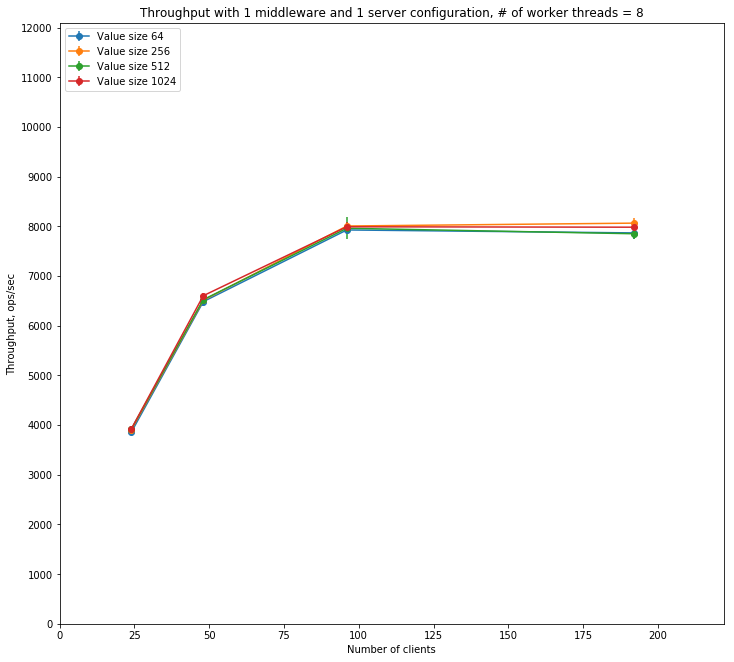

[[3863.3589743589746, 6484.133333333334, 7926.764102564102, 7867.297435897436], [3910.2717948717946, 6511.841025641025, 8006.164102564103, 8064.030769230769], [3925.061538461538, 6523.4820512820515, 7960.646153846153, 7850.384615384616], [3927.569230769231, 6602.738461538462, 7990.641025641026, 7982.266666666666]]


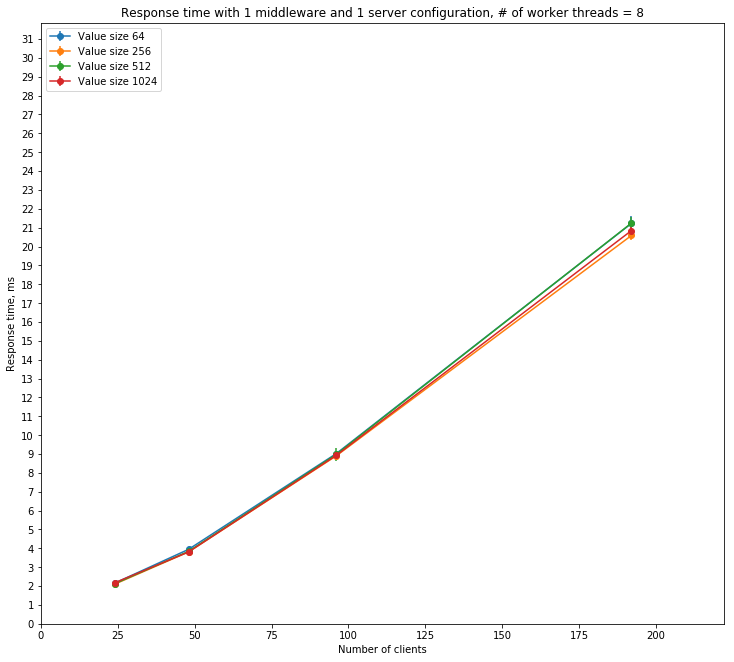

[[2.15780475340311, 3.947009109415805, 9.019274525317991, 21.227486974642844], [2.1020507460298514, 3.8108518682731023, 8.89988419179581, 20.58567389471194], [2.1268796046967093, 3.8402056790498076, 8.979371601068333, 21.240853787990133], [2.1743663465104013, 3.8109657686709637, 8.926266026573744, 20.84452395116868]]


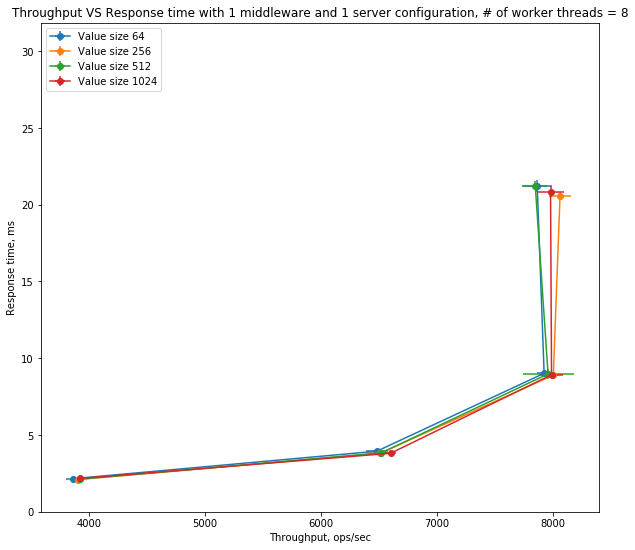

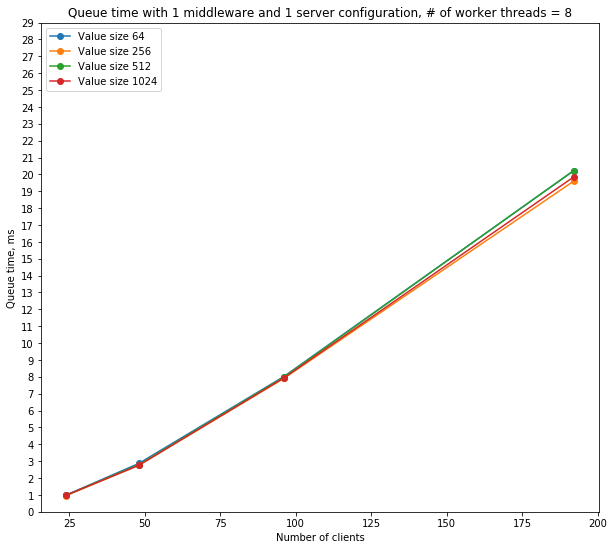

[[0.9964505445639836, 2.8661197431837557, 8.01138240521078, 20.211996039431], [0.9643516156657744, 2.761397974026015, 7.90180963129691, 19.594656486607832], [0.9910737966545029, 2.78757294161762, 7.9755953324237305, 20.222907909133962], [0.9868647143924082, 2.7555210192507538, 7.9267754474173175, 19.843443993159198]]


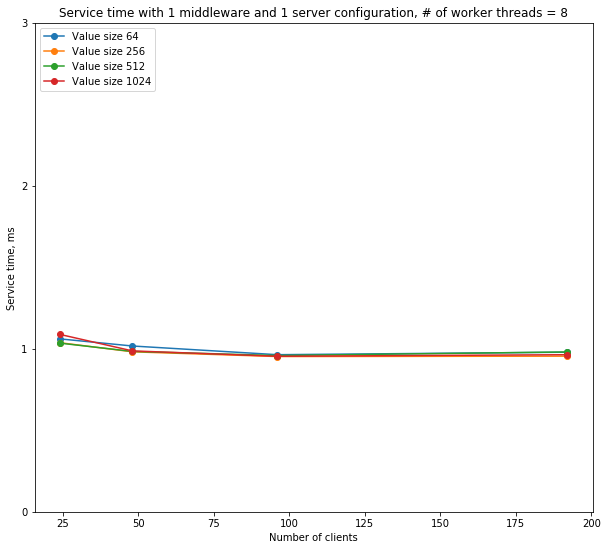

[[1.060287646594235, 1.016684514309486, 0.9634137899579419, 0.9786764164281483], [1.0369191990064301, 0.9809459532890379, 0.9520446425254386, 0.9544104049257036], [1.0342454209439147, 0.983395685330864, 0.9582394419728845, 0.9801943396534548], [1.0876551817787736, 0.986669866582164, 0.9536383224658972, 0.9632692211324847]]


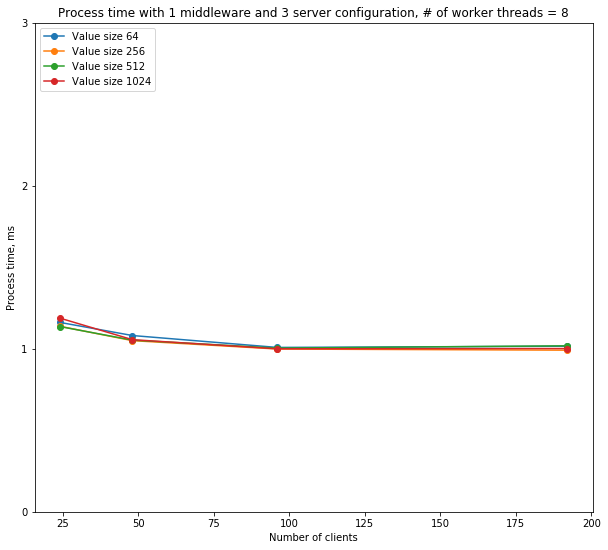

[[1.1613542088391262, 1.0808893662320487, 1.0078921201072122, 1.0154909352118442], [1.137699130364077, 1.0494538942470875, 0.9980745604988976, 0.9910174081041104], [1.1358058080422062, 1.052632737432188, 1.0037762686446017, 1.0179458788561724], [1.187501632117993, 1.0554447494202095, 0.9994905791564267, 1.0010799580094851]]


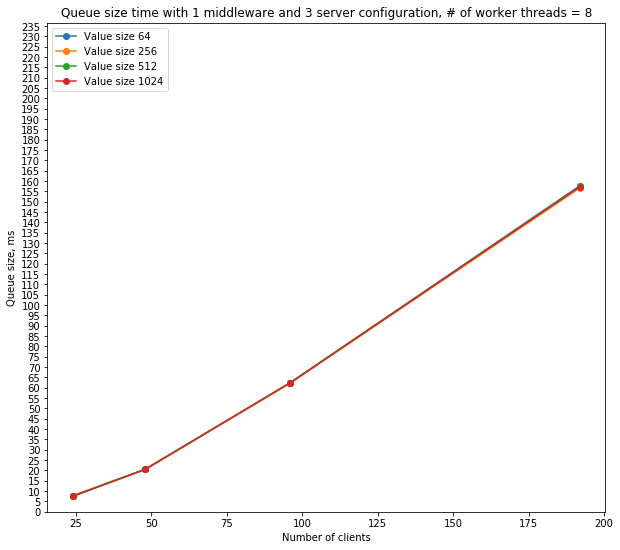

[[7.5865654306402694, 20.559064888967622, 62.404426030863306, 157.78539660770355], [7.57512954047394, 20.50480899095848, 62.16592471698089, 156.72057620862762], [7.764922842953957, 20.63086490697512, 62.38991874129532, 157.4757669883886], [7.476756028391019, 20.49282116045091, 62.38018377951465, 157.29383787909353]]


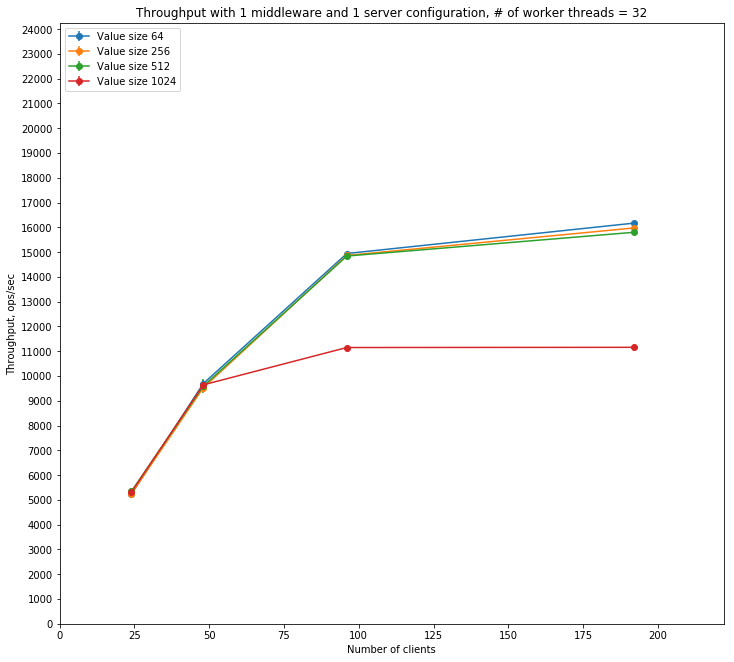

[[5231.379487179488, 9694.271794871796, 14943.916117216117, 16169.902564102564], [5255.548717948718, 9524.266666666668, 14866.107692307696, 15975.230769230768], [5349.902564102565, 9593.358974358976, 14841.784615384613, 15800.405128205128], [5323.05641025641, 9643.410256410256, 11149.876923076923, 11157.85641025641]]


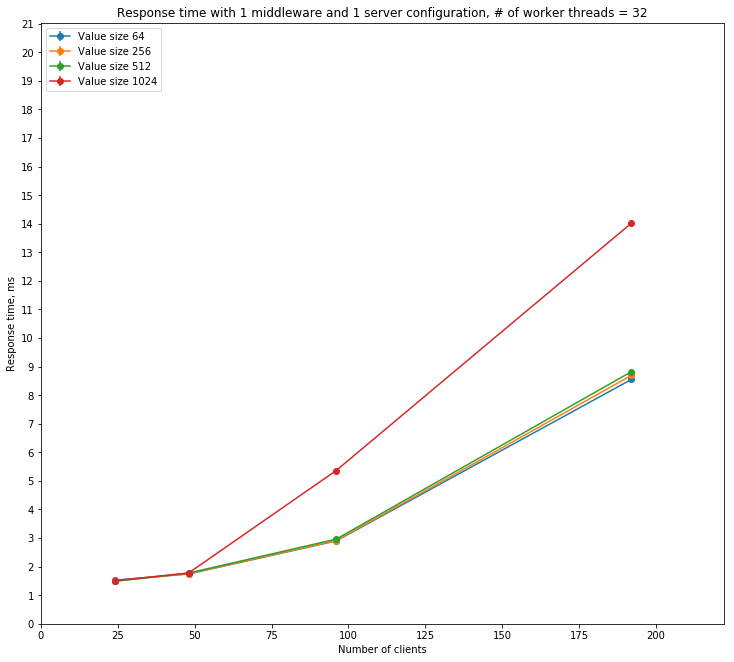

[[1.5266963952244785, 1.7436725785198028, 2.8998161574088632, 8.550608902706548], [1.4981372556672703, 1.7542482576220955, 2.9121464035729527, 8.693333590141147], [1.4877385737195308, 1.775419427435111, 2.9623585248577475, 8.822469011667666], [1.50741043318086, 1.7762425782984528, 5.362958588481602, 14.01922159481051]]


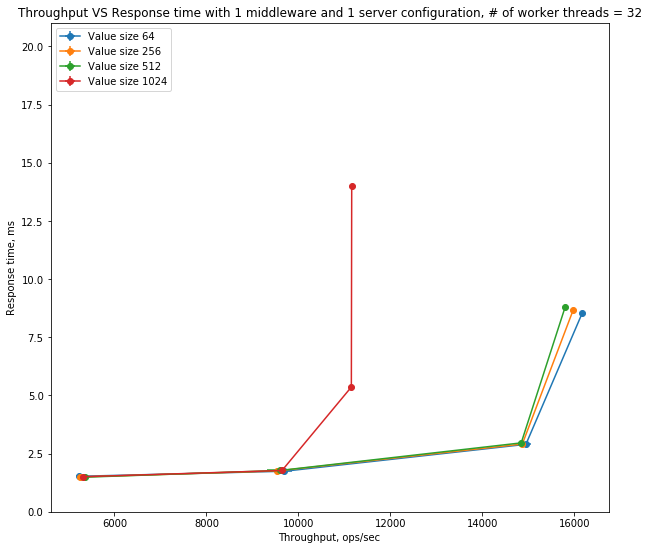

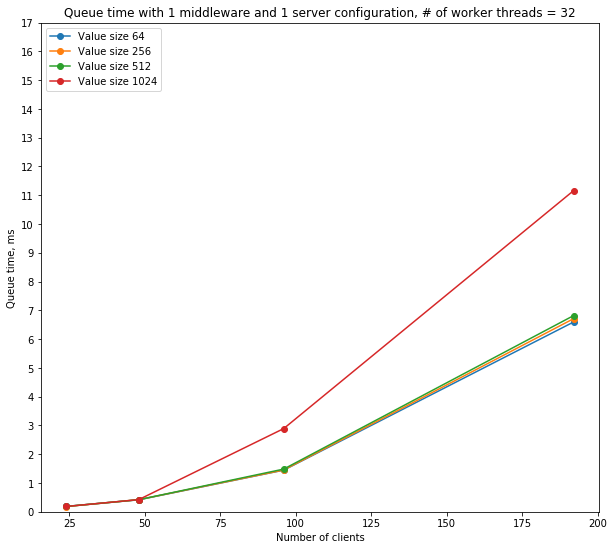

[[0.18896226812754197, 0.41706310308545946, 1.4471863988594802, 6.595007946070111], [0.1838916036969962, 0.4209102578460849, 1.4520045769226924, 6.710276485713461], [0.18564248953491605, 0.42043774940463613, 1.4842247182936048, 6.817268560786659], [0.18536776634977398, 0.423569170391366, 2.891707209830073, 11.159401539308627]]


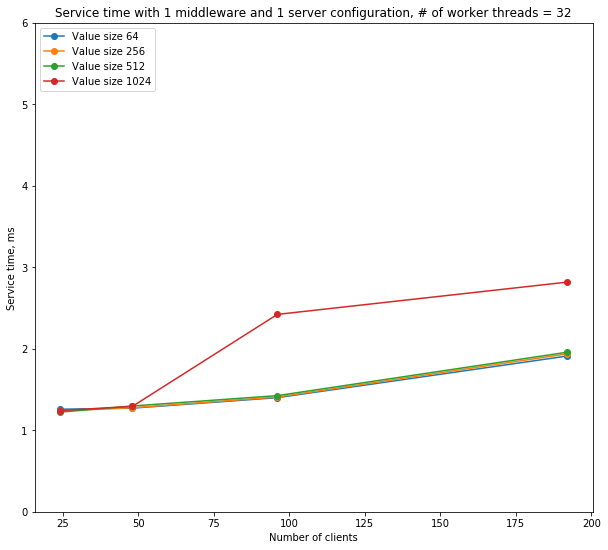

[[1.2581512549026144, 1.2710535378280488, 1.3996067588243442, 1.910121082822122], [1.2371608224567539, 1.2766272603530413, 1.40776559035852, 1.936734752838529], [1.2219048321991965, 1.2977877324324252, 1.424664184416277, 1.9573016465984805], [1.2411464013348799, 1.292878623106519, 2.4208752907931377, 2.816792307317553]]


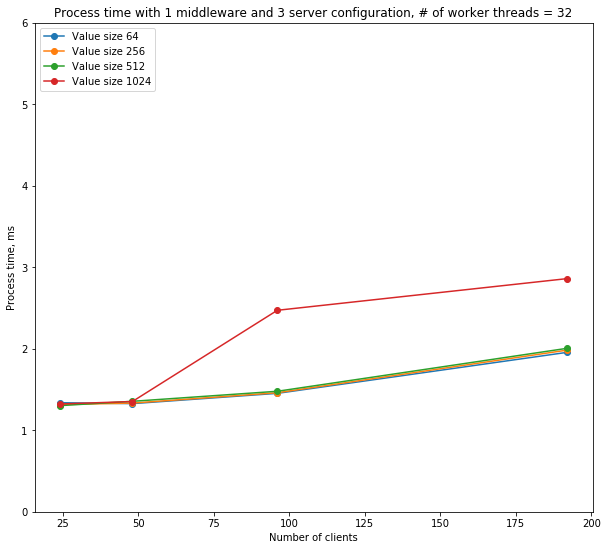

[[1.3377341270969367, 1.3266094754343434, 1.4526297585493828, 1.9556009566364352], [1.314245651970274, 1.3333379997760106, 1.4601418266502604, 1.983057104427688], [1.302096084184615, 1.354981678030475, 1.4781338065641425, 2.005200450881006], [1.3220426668310858, 1.3526734079070868, 2.4712513786515293, 2.859820055501884]]


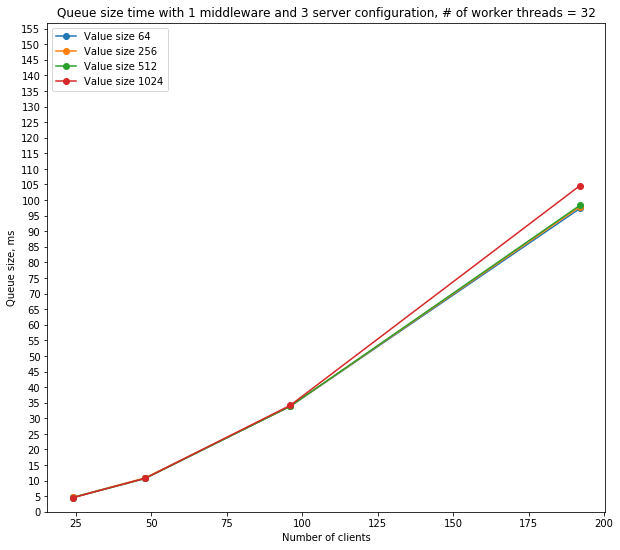

[[4.6302676452453095, 10.741923197574248, 33.807884157759425, 97.30760218969652], [4.590834400174858, 10.881644834894079, 33.81440799257371, 97.90422192047303], [4.530416561624415, 10.684226000358153, 33.83652943802459, 98.32524839512391], [4.514424911078655, 10.74383835912926, 34.11779180269209, 104.62287903843308]]


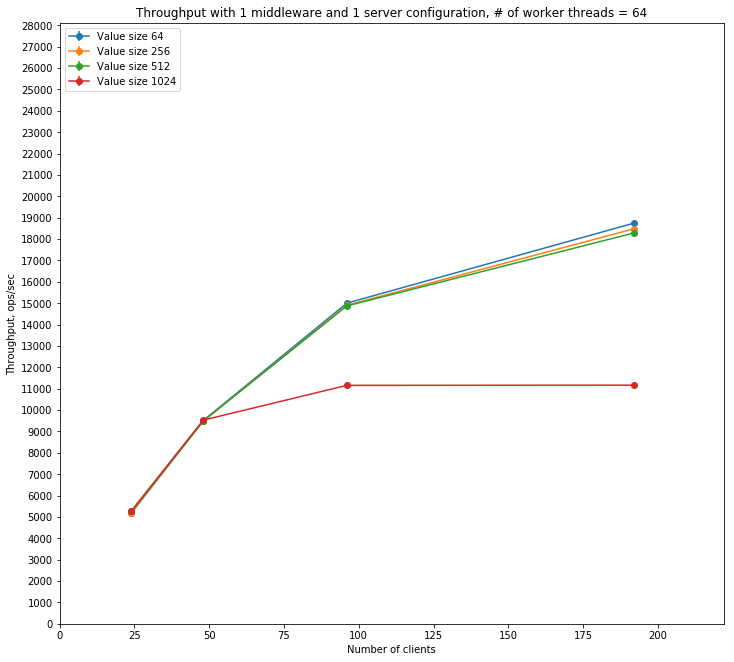

[[5187.205128205128, 9510.010256410256, 15000.58974358974, 18743.61025641025], [5205.810256410256, 9484.4, 14901.66666666667, 18478.066666666666], [5258.482051282051, 9490.671794871792, 14870.400000000001, 18283.866666666665], [5291.9025641025655, 9527.779487179487, 11154.066666666668, 11163.574358974356]]


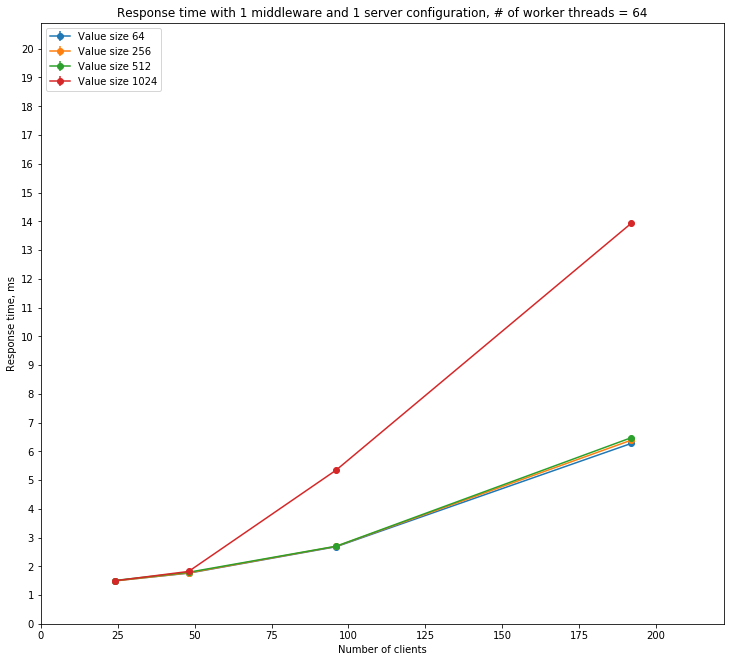

[[1.4949486161709533, 1.7606543604256135, 2.6809469029422774, 6.275296825940545], [1.4902027616085773, 1.770083451476054, 2.693472937978027, 6.389165200155527], [1.5052359850361419, 1.792567708859604, 2.6987727814470874, 6.474618228652752], [1.496147476405655, 1.8204623780287281, 5.346322808330685, 13.93469695626389]]


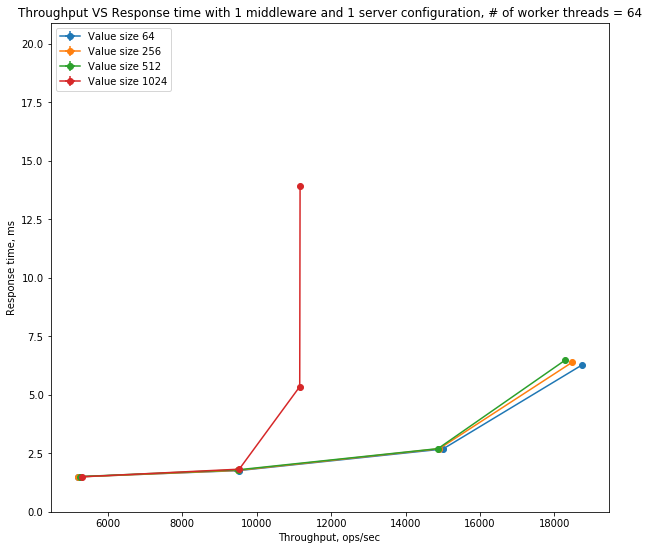

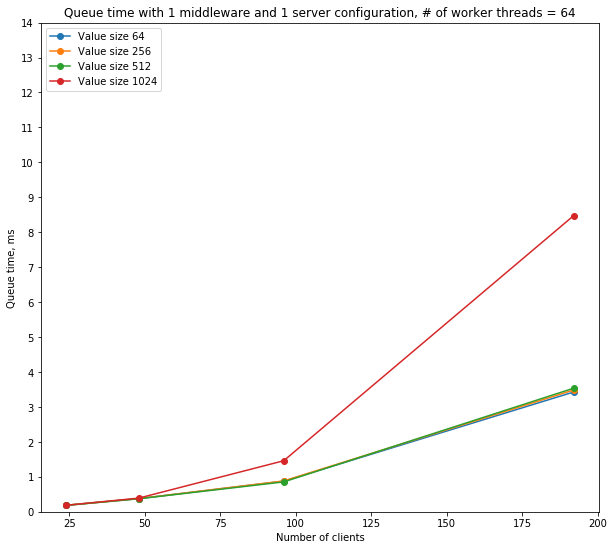

[[0.18785670856792602, 0.37692860208837975, 0.8769952634340872, 3.4267784659059197], [0.1883408380970769, 0.3776273913762843, 0.8827751155007614, 3.4845090076301135], [0.18343696728313916, 0.37286760927463997, 0.8553240165974187, 3.5357338990742573], [0.18654916413175038, 0.3916778844264841, 1.4608934168198053, 8.472605731920252]]


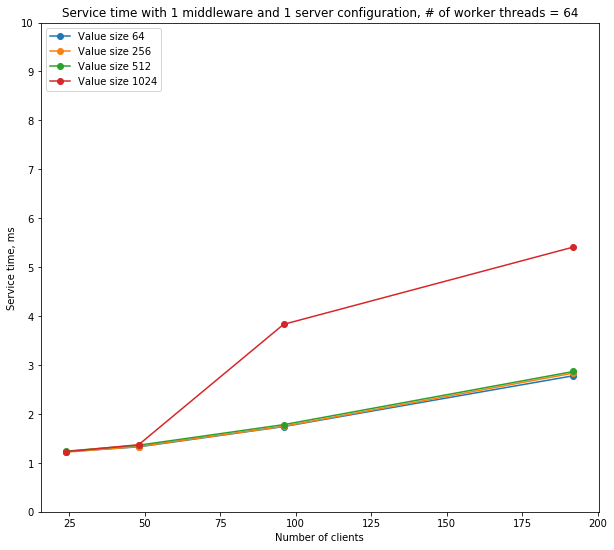

[[1.2284051981947692, 1.3276347945376856, 1.7419103180558713, 2.7812678180379558], [1.220187896561337, 1.333970817396232, 1.7467572892379961, 2.8345980806627846], [1.2395553362382048, 1.3611616480636046, 1.780953937748644, 2.8682102815036044], [1.229823794650947, 1.3708857823035154, 3.8315876973466727, 5.411628111022249]]


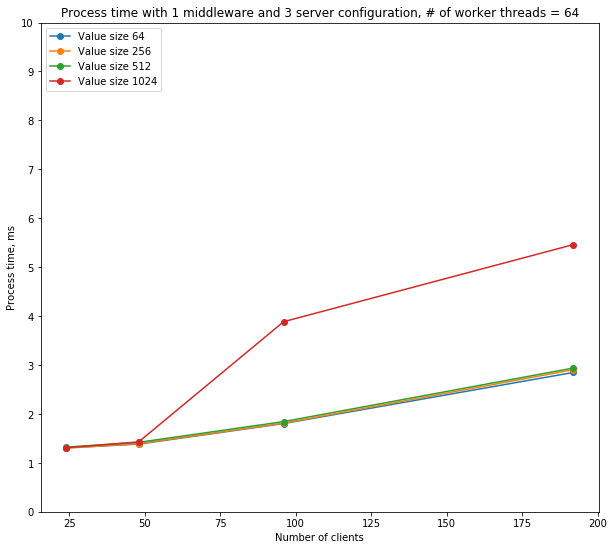

[[1.3070919076030274, 1.383725758337234, 1.80395163950819, 2.848518360034626], [1.3018619235115005, 1.3924560600997695, 1.8106978224772654, 2.9046561925254144], [1.321799017753003, 1.4197000995849636, 1.8434487648496687, 2.9388843295784937], [1.3095983122739046, 1.428784493602244, 3.88542939151088, 5.462091224343641]]


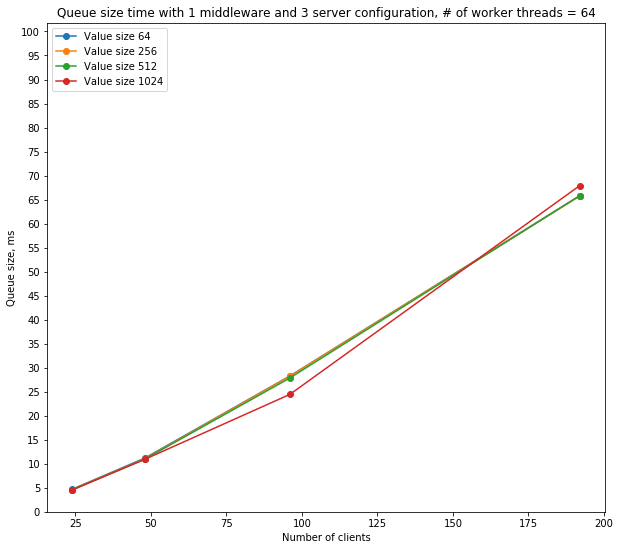

[[4.722675617026115, 11.193858886614482, 28.26813168029291, 65.81030499556225], [4.636377696321565, 11.044763384732176, 28.219724518854367, 65.75364278036636], [4.577085714508623, 10.976709654446122, 27.852364083803725, 65.7881402519918], [4.588902638864797, 10.931445269083603, 24.440098425640322, 67.9044300212642]]


In [87]:
print("Start drawing graphs")
import numpy as np
prefix="/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part3_mid_mid_cl_"
X_axis = [i * 6 for i in client_numbers]
for w in workers:
    TR_overall = []
    RT_overall = []
    QT_overall = []
    ST_overall = []
    QS_overall = []
    PT_overall = []
    
    TR_error_overall = []
    RT_error_overall = []
    QT_error_overall = []
    ST_error_overall = []
    QS_error_overall = []
    PT_error_overall = []
    for value_size in value_sizes:
        TR = []
        RT = []
        QT = []
        ST = []
        QS = []
        PT = []
        TR_error = []
        RT_error = []
        QT_error = []
        ST_error = []
        QS_error = []
        PT_error = []
        for client_number in client_numbers:
            subset = global_data_3[(global_data_3['Worker threads'] == w) &
                                 (global_data_3['Value size'] == value_size) & 
                                 (global_data_3['Client number'] == client_number)]
            
            # for graphs
            groupped0 = subset.groupby(['Repetition']).sum()
            groupped1 = groupped0[[ 'Time5', 'Successful']].mean()
            
            RT.append(groupped1['Time5'] / groupped1['Successful'] / 1000000.0)
            groupped_std = groupped0['Time5'] / groupped0['Successful'] / 1000000.0
            RT_std = np.std(groupped_std.values)
            RT_error.append(RT_std)
            
            groupped2 = subset.groupby(['Repetition', 'Worker thread']).sum()[['Successful', 'Duration']]
            groupped3 = groupped2['Successful'] / groupped2['Duration'] * 1000.0
            TR.append(groupped3.groupby(['Repetition']).sum().mean())
            TR_std = np.std(groupped3.groupby(['Repetition']).sum().values)
            TR_error.append(TR_std)
            
            '''groupped = subset.groupby(['Repetition']).sum()
            TR_std = np.std(groupped['TR'].values)
            TR_error.append(TR_std)
            TR.append(float(groupped.mean()['TR']))
            groupped1 = subset.groupby(['Repetition']).sum()
            groupped2 = groupped1['Total time']/groupped1['Total ops']
            RT.append(float(groupped2.mean()))
            RT_std = np.std(groupped2.values)
            RT_error.append(RT_std)'''
            
            # for formula checks
            # queue average time for all threads
            groupped4 = subset.groupby(['Repetition']).sum()
            groupped5 = groupped4[[ 'Time1', 'Successful']].mean()
            QT.append(groupped5['Time1'] / groupped5['Successful'] / 1000000.0)
            
            # average service time
            groupped6 = subset.groupby(['Repetition']).sum()
            groupped7 = groupped6[['Time3', 'Successful']].mean()
            ST.append(groupped7['Time3'] / groupped7['Successful'] / 1000000.0)
            
            # average process time
            groupped13 = subset.groupby(['Repetition']).sum()
            groupped14 = groupped13[['Time4', 'Successful']].mean()
            PT.append(groupped14['Time4'] / groupped14['Successful'] / 1000000.0)
            
            # average queue size
            groupped8 = subset.groupby(['Repetition']).sum()
            groupped9 = groupped8[['Queue size', 'Successful']].mean()
            QS.append(groupped9['Queue size'] / groupped9['Successful'])
            
            # TR per worker
            #groupped10 = subset.groupby(['Repetition', 'Worker thread']).sum()[['Successful', 'Duration']]
            #groupped11 = groupped10['Successful'] / groupped10['Duration'] * 1000.0    
            #groupped12 = groupped11.groupby(['Repetition']).mean().mean()
            #print(groupped12)
        TR_overall.append(TR)
        RT_overall.append(RT)
        QT_overall.append(QT)
        ST_overall.append(ST)
        QS_overall.append(QS)
        PT_overall.append(PT)
        TR_error_overall.append(TR_error)
        RT_error_overall.append(RT_error)
        
    plt.figure(figsize=(10, 9))
    plt.title("Throughput with 1 middleware and 1 server configuration, # of worker threads = "+str(w))
    max1 = 0
    for i in range(len(TR_overall)):
        plt.errorbar(X_axis, TR_overall[i],
                yerr=TR_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(TR_overall[i]) + max(TR_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xlim(0, max(X_axis) + 30)
    plt.xticks(np.arange(0, max(X_axis) + 30, 25))
    plt.yticks(np.arange(0, max1, 1000))
    plt.ylabel('Throughput, ops/sec')
    plt.xlabel('Number of clients')
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_tr.pdf")
    #plt.savefig(prefix+str(w)+"_tr.png", dpi=300)
    plt.show()
    print(TR_overall)

    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Response time with 1 middleware and 1 server configuration, # of worker threads = "+str(w))
    for i in range(len(RT_overall)):
        #plt.plot(X_axis, RT_overall[i], '-o',
        #        label="Value size "+str(value_sizes[i]))
        plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xlim(0, max(X_axis) + 30)
    plt.xticks(np.arange(0, max(X_axis) + 30, 25))
    plt.yticks(np.arange(0, max1, 1))
    plt.ylabel('Response time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_rt.pdf")
    #plt.savefig(prefix+str(w)+"_rt.png", dpi=300) 
    plt.show()
    print(RT_overall)

    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Throughput VS Response time with 1 middleware and 1 server configuration, # of worker threads = "+str(w))
    for i in range(len(RT_overall)):
        #plt.plot(TR_overall[i], RT_overall[i], '-o',
        #        label="Value size "+str(value_sizes[i]))
        plt.errorbar(TR_overall[i], RT_overall[i],
                xerr=TR_error_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.ylabel('Response time, ms')
    plt.xlabel('Throughput, ops/sec') 
    plt.legend(loc="upper left")
    plt.savefig(prefix + str(w) + "_rttr.pdf", bbox_inches = 'tight',
                pad_inches = 0)
    #plt.savefig(prefix+str(w)+"_rttr.png", dpi=300) 
    plt.show()
    
    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Queue time with 1 middleware and 1 server configuration, # of worker threads = "+str(w))
    for i in range(len(QT_overall)):
        plt.plot(X_axis, QT_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        '''plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))'''
        max2 = max(QT_overall[i]) + max(QT_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1) 
    plt.yticks(np.arange(0, max1 + 3, 1))
    plt.ylabel('Queue time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.show()
    print(QT_overall)
    
    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Service time with 1 middleware and 1 server configuration, # of worker threads = "+str(w))
    for i in range(len(ST_overall)):
        plt.plot(X_axis, ST_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        '''plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))'''
        max2 = max(ST_overall[i]) + max(ST_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1) 
    plt.yticks(np.arange(0, max1 + 2, 1))
    plt.ylabel('Service time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.show()
    print(ST_overall)
    
    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Process time with 1 middleware and 3 server configuration, # of worker threads = "+str(w))
    for i in range(len(PT_overall)):
        plt.plot(X_axis, PT_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        '''plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))'''
        max2 = max(PT_overall[i]) + max(PT_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1) 
    plt.yticks(np.arange(0, max1+2, 1))
    plt.ylabel('Process time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.show()
    print(PT_overall)
    
    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Queue size time with 1 middleware and 3 server configuration, # of worker threads = "+str(w))
    for i in range(len(QS_overall)):
        plt.plot(X_axis, QS_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        '''plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))'''
        max2 = max(QS_overall[i]) + max(QS_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1) 
    plt.yticks(np.arange(0, max1+2, 5))
    plt.ylabel('Queue size, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.show()
    print(QS_overall)

Start drawing graphs


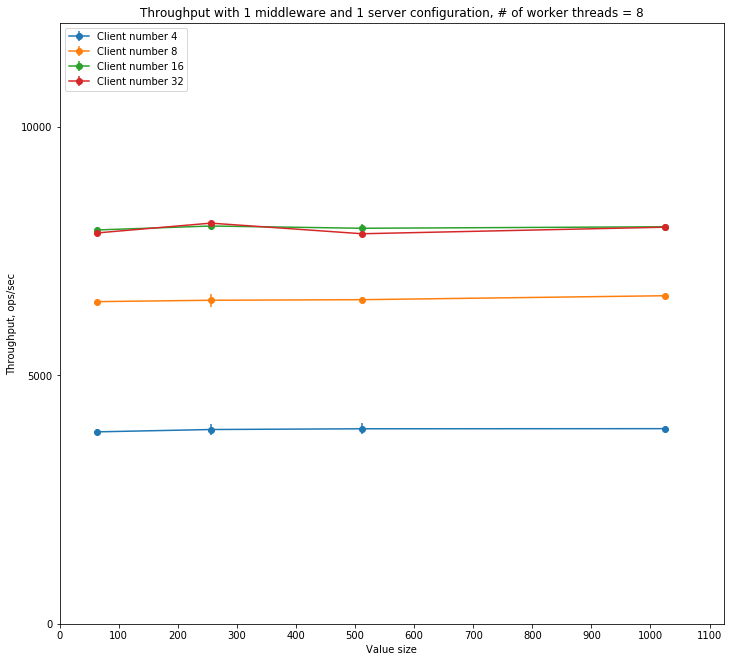

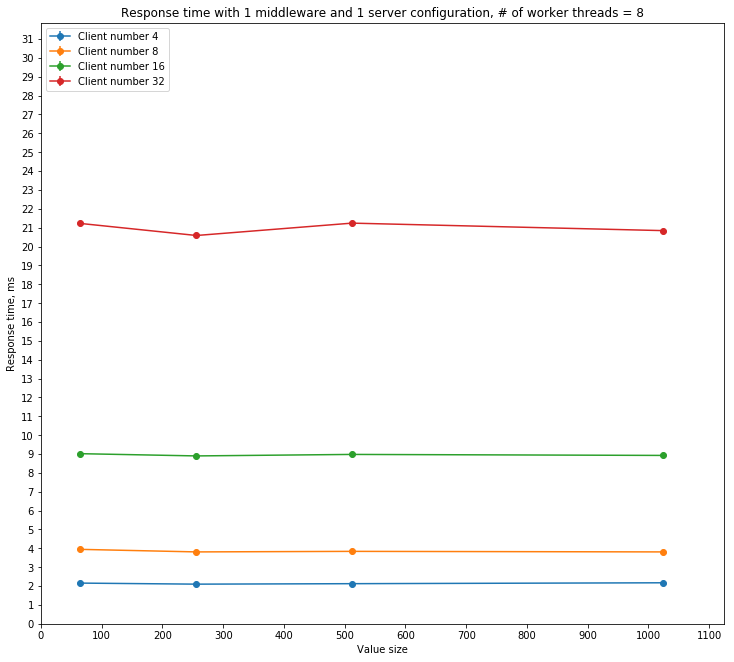

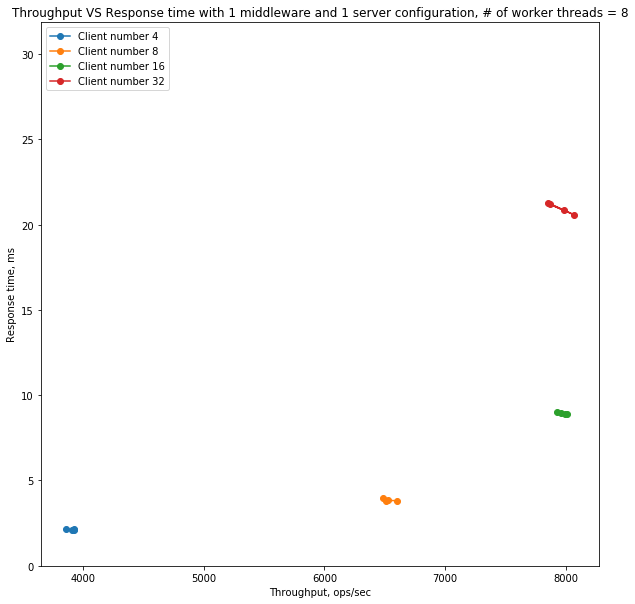

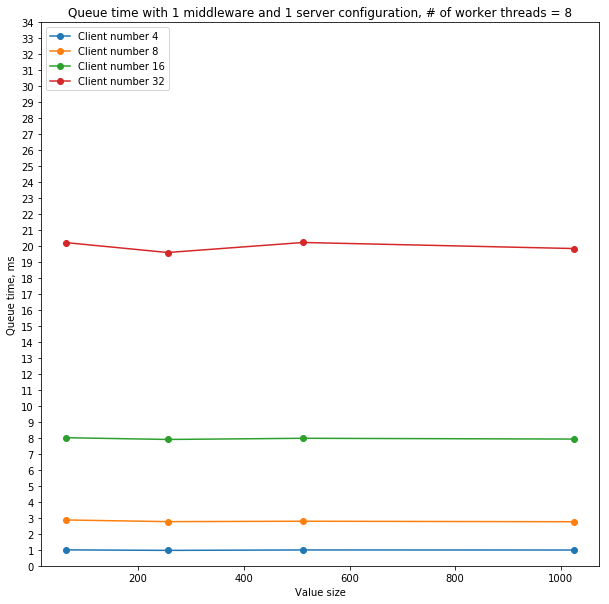

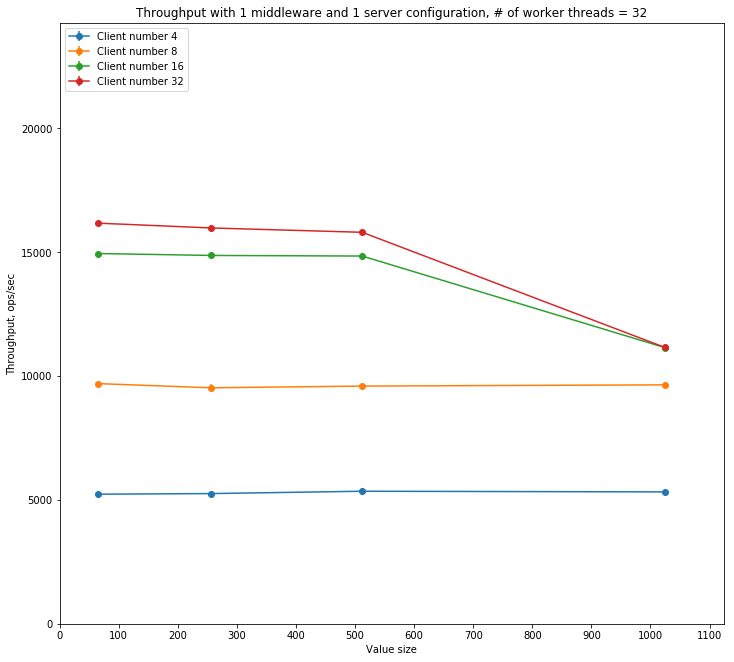

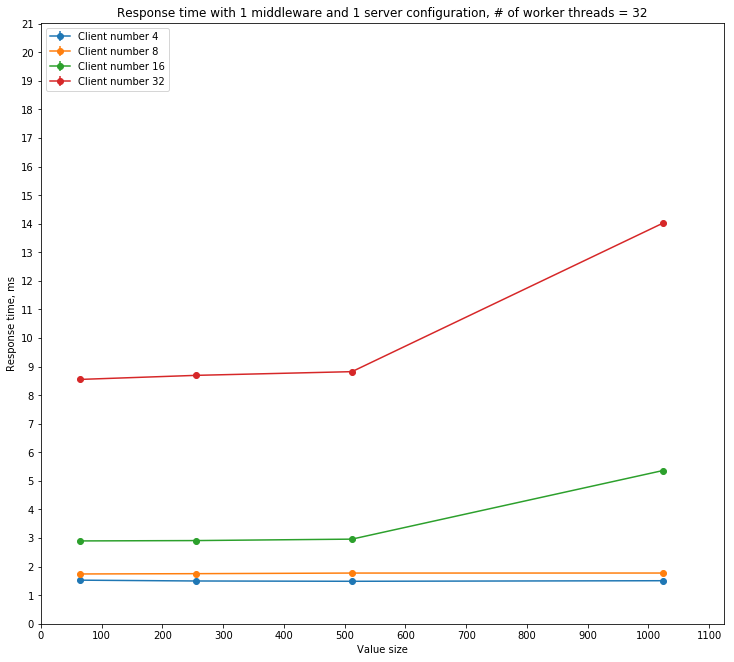

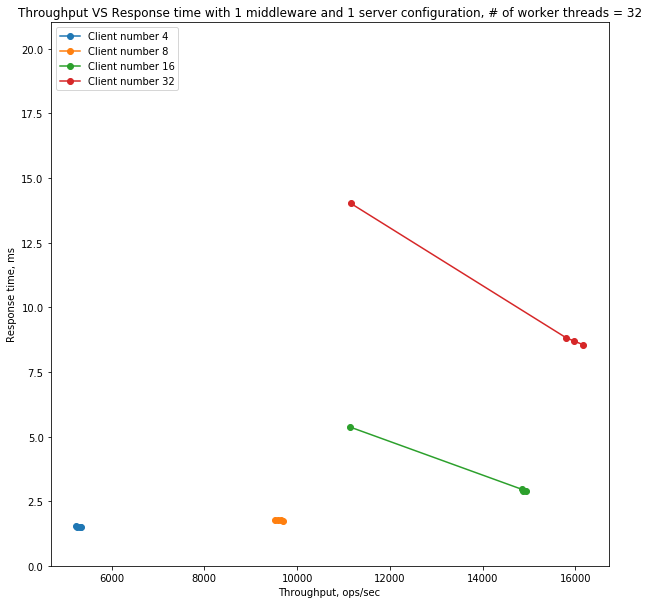

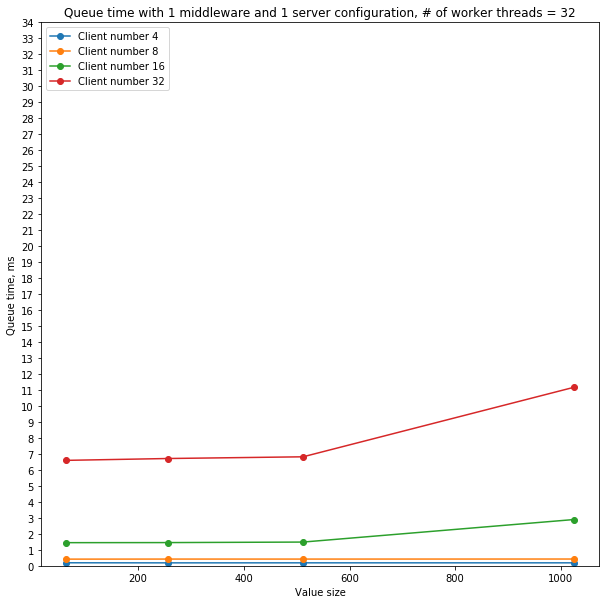

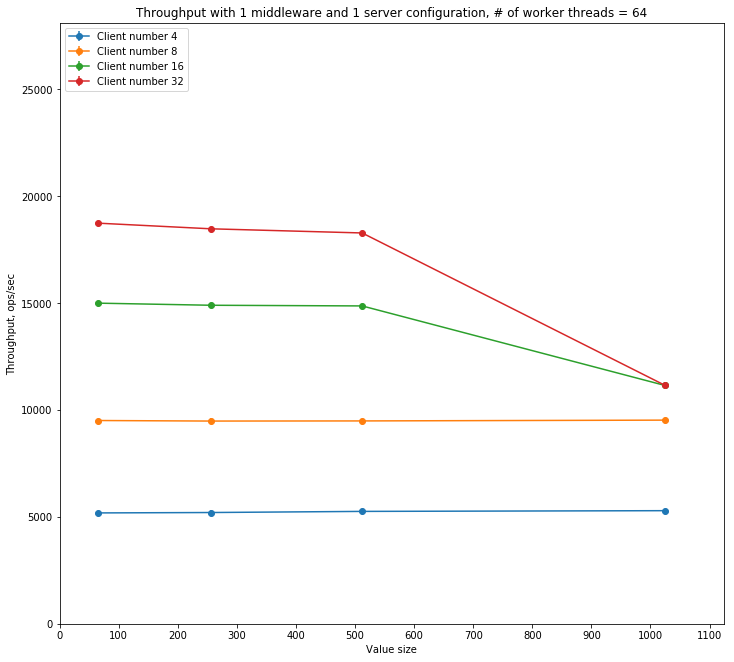

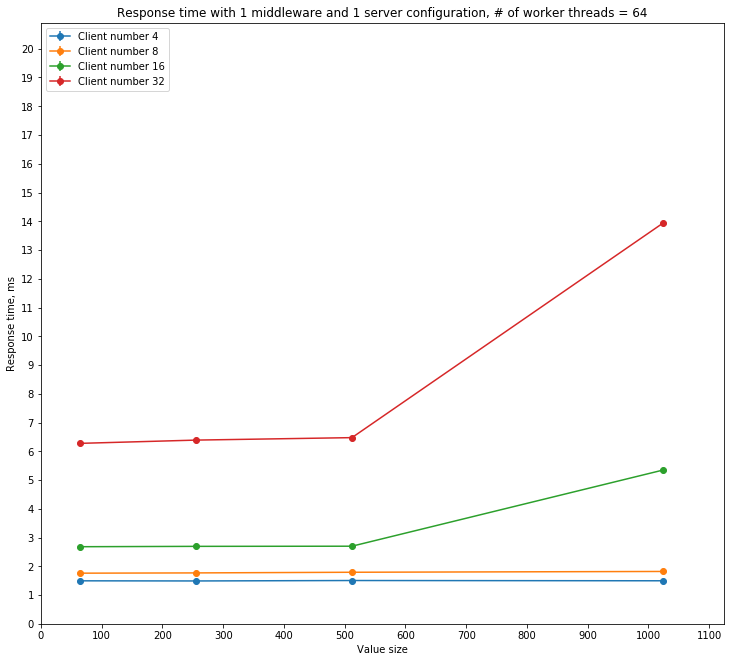

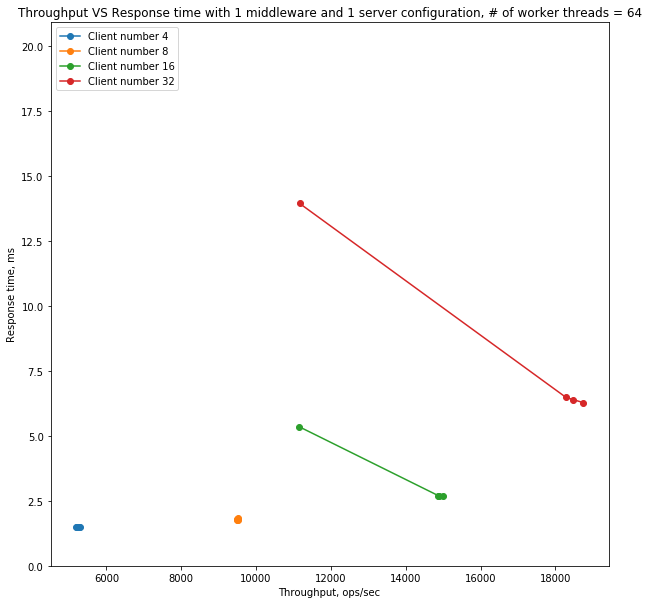

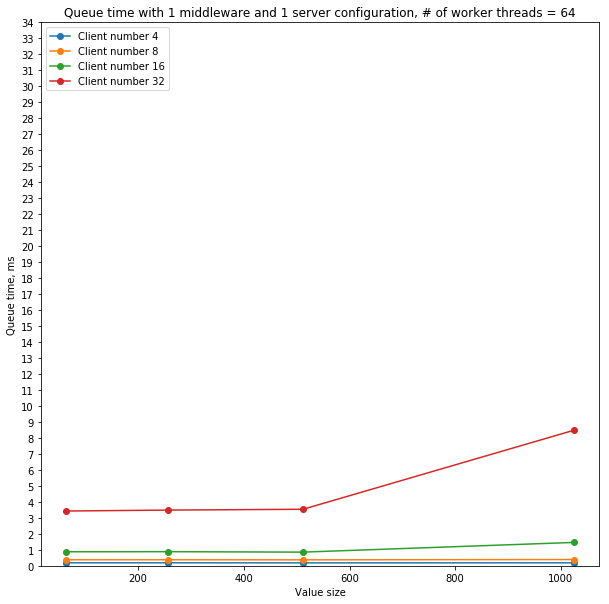

In [72]:
print("Start drawing graphs")
X_axis = value_sizes
prefix="/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part3_mid_mid_vl_"
for w in workers:
    TR_overall = []
    RT_overall = []
    QT_overall = []
    ST_overall = []
    QS_overall = []
    PT_overall = []
    for client_number in client_numbers:
        TR = []
        RT = []
        QT = []
        ST = []
        QS = []
        PT = []
        TR_error = []
        RT_error = []
        for value_size in value_sizes:
            subset = global_data_3[(global_data_3['Worker threads'] == w) &
                                 (global_data_3['Value size'] == value_size) & 
                                 (global_data_3['Client number'] == client_number)]
            
            # for graphs
            groupped0 = subset.groupby(['Repetition']).sum()
            groupped1 = groupped0[[ 'Time5', 'Successful']].mean()
            RT.append(groupped1['Time5'] / groupped1['Successful'] / 1000000.0)
            groupped_std = groupped0['Time5'] / groupped0['Successful'] / 1000000.0
            RT_std = np.std(groupped_std.values)
            RT_error.append(RT_std)
            
            groupped2 = subset.groupby(['Repetition', 'Worker thread']).sum()[['Successful', 'Duration']]
            groupped3 = groupped2['Successful'] / groupped2['Duration'] * 1000.0
            TR.append(groupped3.groupby(['Repetition']).sum().mean())
            TR_std = np.std(groupped3.groupby(['Repetition']).sum().values)
            TR_error.append(TR_std)
            
            '''groupped = subset.groupby(['Repetition']).sum()
            TR_std = np.std(groupped['TR'].values)
            TR_error.append(TR_std)
            TR.append(float(groupped.mean()['TR']))
            groupped1 = subset.groupby(['Repetition']).sum()
            groupped2 = groupped1['Total time']/groupped1['Total ops']
            RT.append(float(groupped2.mean()))
            RT_std = np.std(groupped2.values)
            RT_error.append(RT_std)'''
            
            # for formula checks
            # queue average time for all threads
            groupped4 = subset.groupby(['Repetition']).sum()
            groupped5 = groupped4[[ 'Time1', 'Successful']].mean()
            QT.append(groupped5['Time1'] / groupped5['Successful'] / 1000000.0)
            
            # average service time
            groupped6 = subset.groupby(['Repetition']).sum()
            groupped7 = groupped6[['Time3', 'Successful']].mean()
            ST.append(groupped7['Time3'] / groupped7['Successful'] / 1000000.0)
            
            # average process time
            groupped13 = subset.groupby(['Repetition']).sum()
            groupped14 = groupped13[['Time4', 'Successful']].mean()
            PT.append(groupped14['Time4'] / groupped14['Successful'] / 1000000.0)
            
            # average queue size
            groupped8 = subset.groupby(['Repetition']).sum()
            groupped9 = groupped8[['Queue size', 'Successful']].mean()
            QS.append(groupped9['Queue size'] / groupped9['Successful'])
            
            # TR per worker
            #groupped10 = subset.groupby(['Repetition', 'Worker thread']).sum()[['Successful', 'Duration']]
            #groupped11 = groupped10['Successful'] / groupped10['Duration'] * 1000.0    
            #groupped12 = groupped11.groupby(['Repetition']).mean().mean()
            #print(groupped12)
        TR_overall.append(TR)
        RT_overall.append(RT)
        QT_overall.append(QT)
        ST_overall.append(ST)
        QS_overall.append(QS)
        PT_overall.append(PT)
        
    plt.figure(figsize=(10, 9))
    plt.title("Throughput with 1 middleware and 1 server configuration, # of worker threads = "+str(w))
    max1 = 0
    for i in range(len(TR_overall)):
        #plt.plot(X_axis, TR_overall[i], '-o',
        #        label="Client number "+str(client_numbers[i]))
        plt.errorbar(X_axis, TR_overall[i],
                yerr=TR_error_overall[i],
                fmt='-o',
                label="Client number "+str(client_numbers[i]))
        max2 = max(TR_overall[i]) + max(TR_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xlim(0, max(X_axis) + 100)
    plt.xticks(np.arange(0, max(X_axis) + 100, 100))
    plt.yticks(np.arange(0, max1, 5000))
    plt.ylabel('Throughput, ops/sec')
    plt.xlabel('Value size')
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_tr.pdf")
    #plt.savefig(prefix+str(w)+"_tr.png", dpi=300)
    plt.show()

    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Response time with 1 middleware and 1 server configuration, # of worker threads = "+str(w))
    for i in range(len(RT_overall)):
        #plt.plot(X_axis, RT_overall[i], '-o',
        #        label="Client number "+str(client_numbers[i]))
        plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Client number "+str(client_numbers[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xlim(0, max(X_axis) + 100)
    plt.xticks(np.arange(0, max(X_axis) + 100, 100))
    plt.yticks(np.arange(0, max1, 1))
    plt.ylabel('Response time, ms')
    plt.xlabel('Value size') 
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_rt.pdf")
    #plt.savefig(prefix+str(w)+"_rt.png", dpi=300) 
    plt.show()

    max1 = 0
    plt.figure(figsize=(10, 10))
    plt.title("Throughput VS Response time with 1 middleware and 1 server configuration, # of worker threads = "+str(w))
    for i in range(len(RT_overall)):
        plt.plot(TR_overall[i], RT_overall[i], '-o',
                label="Client number "+str(client_numbers[i]))
        '''plt.errorbar(TR_overall[i], RT_overall[i],
                xerr=TR_error_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))'''
        max2 = max(RT_overall[i]) + max(RT_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.ylabel('Response time, ms')
    plt.xlabel('Throughput, ops/sec') 
    plt.legend(loc="upper left")
    plt.savefig(prefix + str(w) + "_rttr.pdf", bbox_inches = 'tight',
                pad_inches = 0)
    #plt.savefig(prefix+str(w)+"_rttr.png", dpi=300) 
    plt.show()
    
    max1 = 0
    plt.figure(figsize=(10, 10))
    plt.title("Queue time with 1 middleware and 1 server configuration, # of worker threads = "+str(w))
    for i in range(len(RT_overall)):
        plt.plot(X_axis, QT_overall[i], '-o',
                label="Client number "+str(client_numbers[i]))
        '''plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))'''
        max2 = max(RT_overall[i]) + max(RT_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1) 
    plt.yticks(np.arange(0, 35, 1))
    plt.ylabel('Queue time, ms')
    plt.xlabel('Value size') 
    plt.legend(loc="upper left")
    #plt.savefig(prefix+str(w)+"_qt.png", dpi=300) 
    plt.show()

# Client part

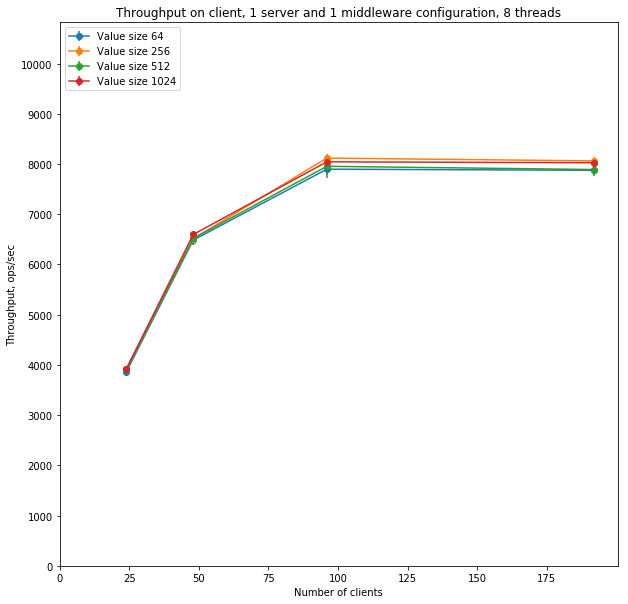

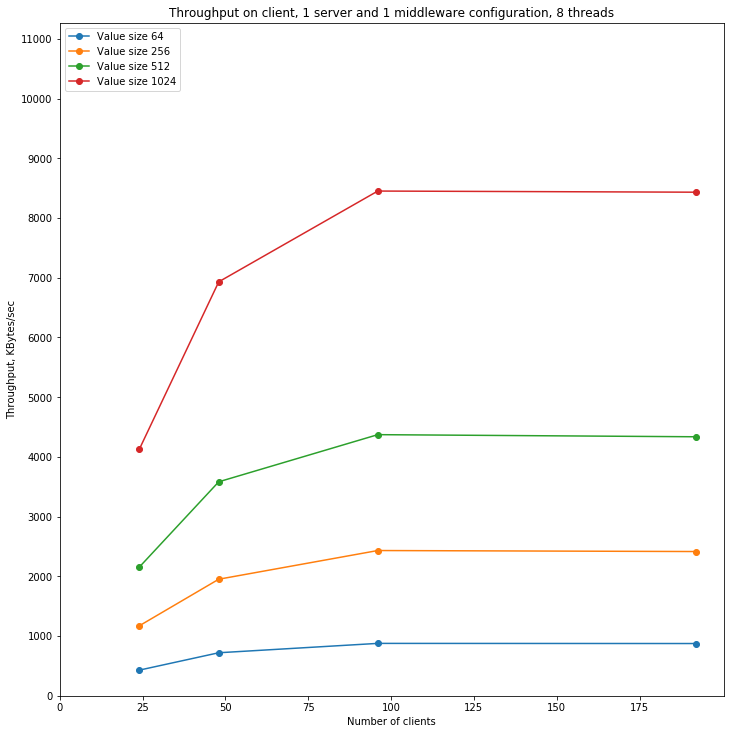

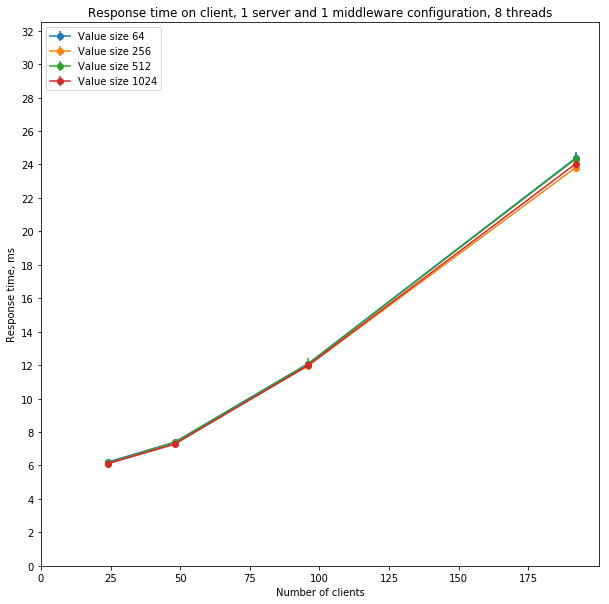

[[6.204965800101569, 7.394591698561431, 12.092681687396697, 24.37806982463051], [6.132234097177331, 7.362290346528959, 11.96305569079469, 23.809323192649728], [6.119254759761394, 7.355269029720563, 12.07015596934619, 24.3303536787121], [6.105303021786512, 7.268847092165191, 11.985802941717035, 24.033494611120464]]


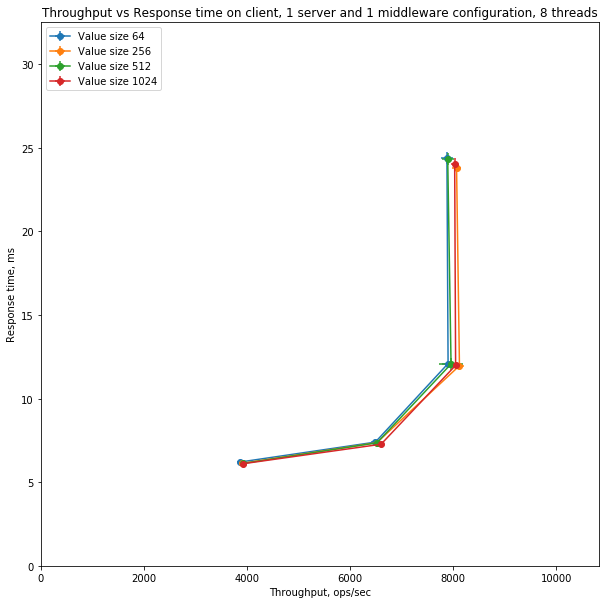

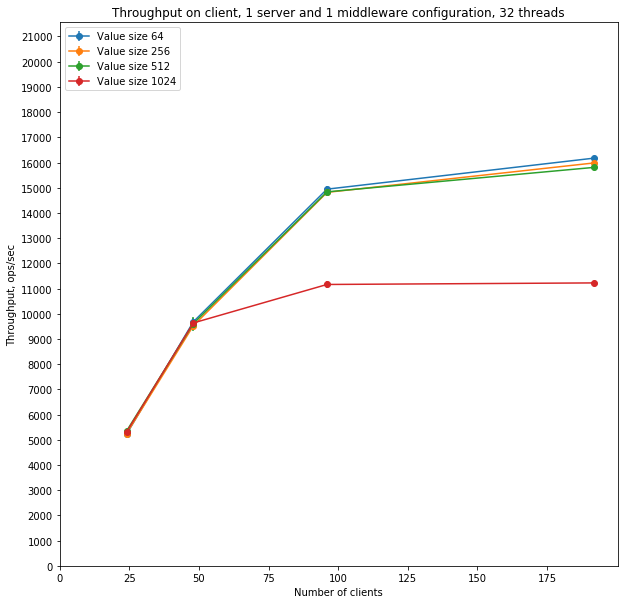

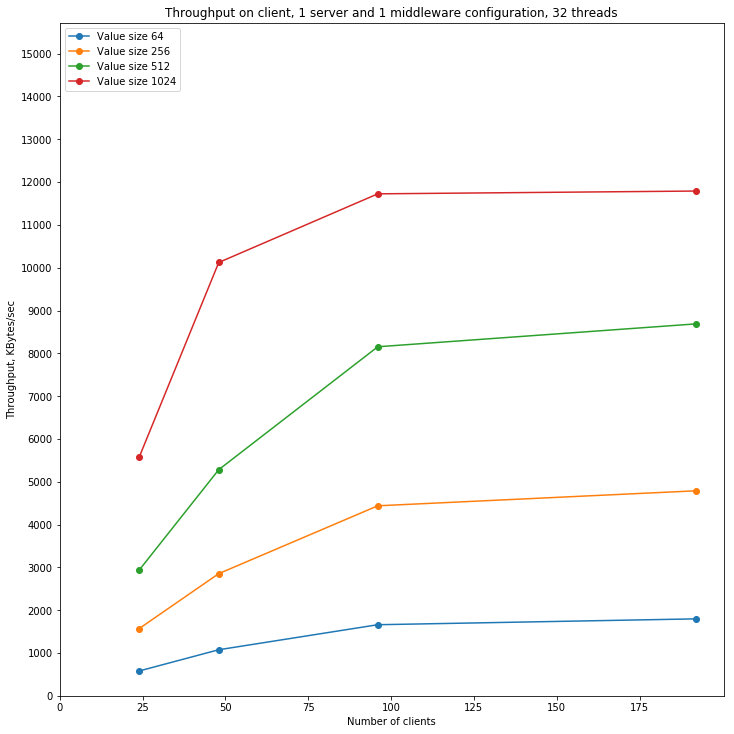

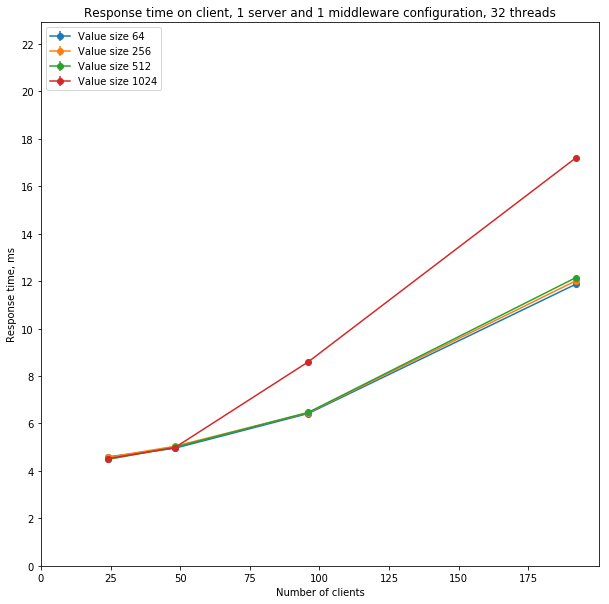

[[4.590200997226318, 4.952977667839003, 6.418791967216522, 11.864179281631792], [4.5701531767232515, 5.034275811388362, 6.454370315968216, 12.006168641893652], [4.484215186505698, 4.9919594921935575, 6.464951647844703, 12.140132457491298], [4.515634759242765, 4.975956721818405, 8.595923893565873, 17.183906149013126]]


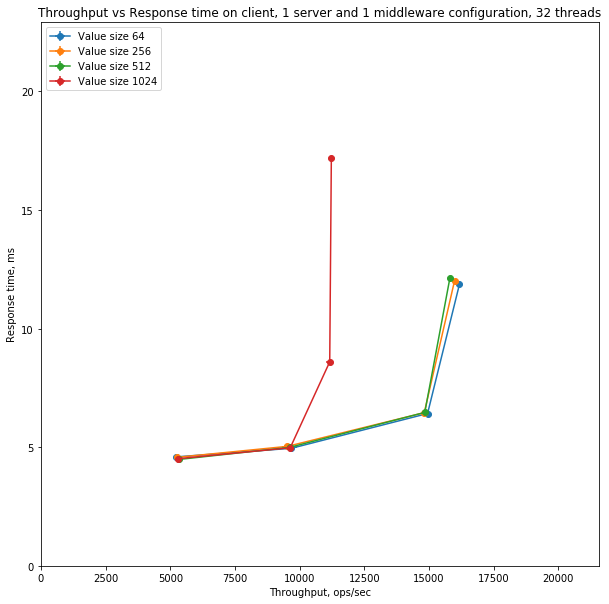

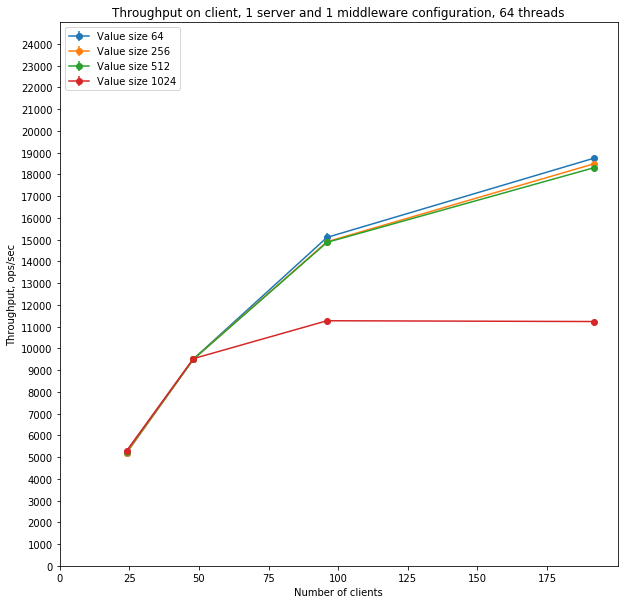

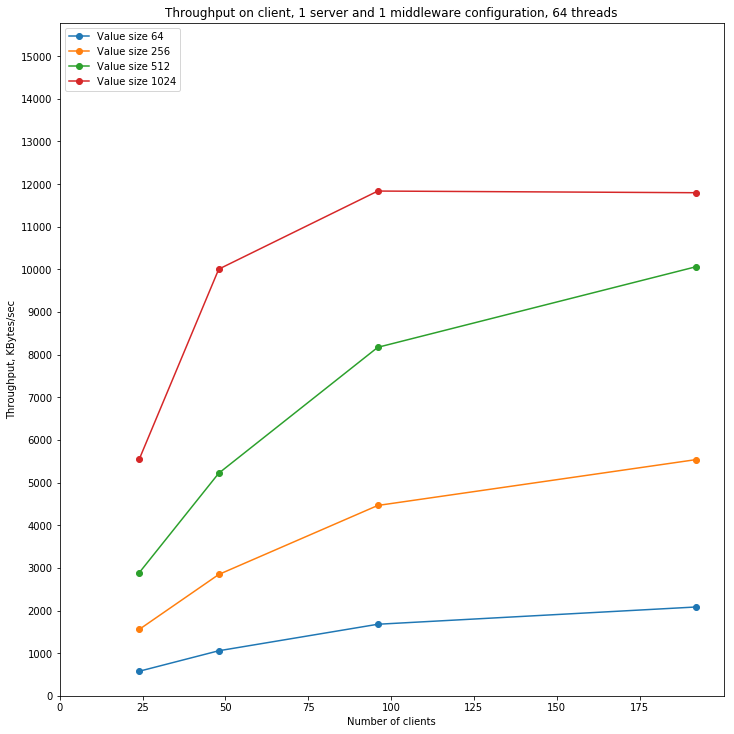

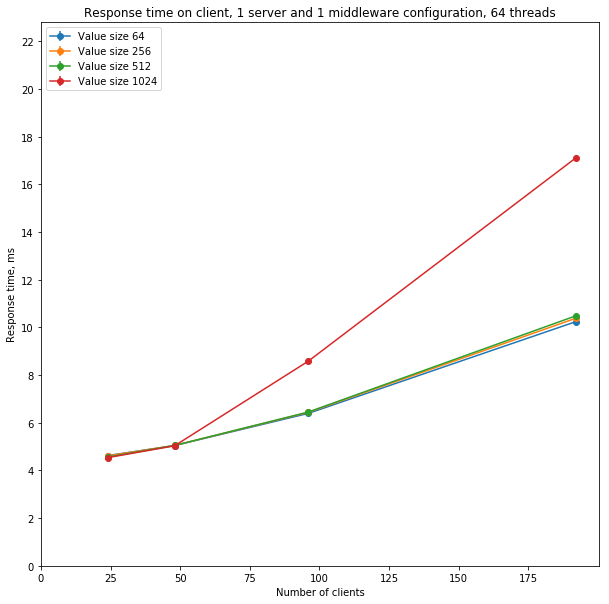

[[4.62453860680554, 5.0444424779351715, 6.393051425286405, 10.237103593376622], [4.611873818389213, 5.048968487680641, 6.437113007471745, 10.379974627952086], [4.5634135390247215, 5.048016168984746, 6.450013982067336, 10.482016807714402], [4.538585400684247, 5.033415245575174, 8.583274421615998, 17.102516110046313]]


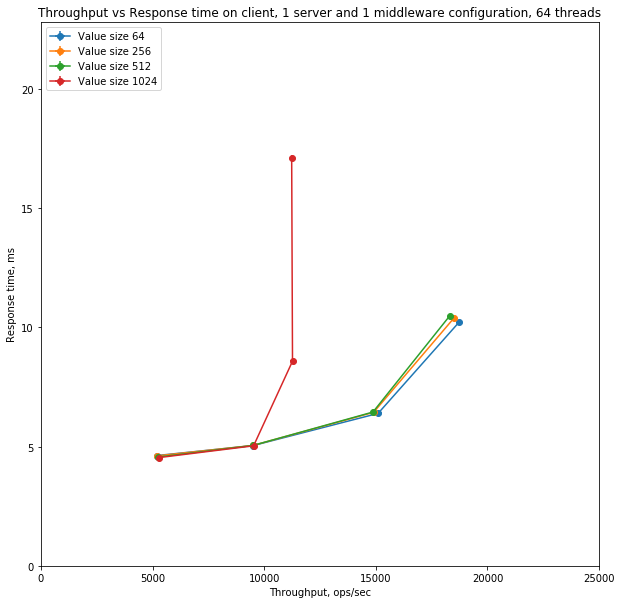

In [88]:
TR_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part3_cl_TR_value_file.txt", "w")
RT_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part3_cl_RT_value_file.txt", "w")

path_to_experiment="/home/anastasiia/experiment_1/fourth_copy/part3/"
value_sizes=[64, 256, 512, 1024]
client_numbers=[4, 8, 16, 32]
workers = [8, 32, 64]
repetitions = 3
memtier_instances = 3
experiments = len(workers) * len(value_sizes) * len(client_numbers) * repetitions
prefix="/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part3_mid_cl_cl_"


import csv
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean 
import re
import numpy as np


clients_data = []

for i in range(memtier_instances):
    initial = open(path_to_experiment+"client"+str(i+1)+".log","r")
    lines = initial.readlines()
    total_ops = 0
    for line in lines:
        if line.startswith("[RUN #1 100%"):
            line = re.sub(' +', ' ', line)
            parts = line.split(' ')
            total_ops = parts[7]
        if line.startswith("Gets"):
            line = re.sub(' +', ' ', line)
            parts = line.split(' ')
            parts = [parts[1], parts[4], parts[5], total_ops]
            clients_data.append(parts) 
    initial .close()


global_data = pd.DataFrame(columns=['Worker threads', 'Value size', 'Client number', 'Repetition', 'Memtier instance', 'TR', 'RT', 'TR_B', 'Total ops'])

j = 0
k = 0
for value_size in value_sizes:
    for w in workers:
        for n in client_numbers:
            for rep in range(repetitions):
                for memtier in range(memtier_instances):
                    d = [w, value_size, n, rep, memtier, clients_data[memtier * experiments + k][0], clients_data[memtier * experiments + k][1], clients_data[memtier * experiments + k][2], clients_data[memtier * experiments + k][3]]
                    global_data.loc[j] = d
                    j += 1
                k += 1

global_data['Worker threads'] = global_data['Worker threads'].astype(int)
global_data['Value size'] = global_data['Value size'].astype(int)
global_data['Client number'] = global_data['Client number'].astype(int)
global_data['Repetition'] = global_data['Repetition'].astype(int)
global_data['Memtier instance'] = global_data['Memtier instance'].astype(int)
global_data['TR'] = global_data['TR'].astype(float)
global_data['RT'] = global_data['RT'].astype(float)
global_data['TR_B'] = global_data['TR_B'].astype(float)
global_data['Total ops'] = global_data['Total ops'].astype(int)

global_data['Total time'] = global_data['RT']*global_data['Total ops']

TR_graph = []
X_axis =[i * 6 for i in client_numbers]

for w in workers:
    TR_overall = []
    RT_overall = []
    TR_B_overall = []
    TR_error_overall = []
    RT_error_overall = []
    for value_size in value_sizes:
        TR = []
        RT = []
        TR_B = []
        TR_error = []
        RT_error = []

        for client_number in client_numbers:
            subset = global_data[(global_data['Worker threads'] == w) &
                                 (global_data['Value size'] == value_size) & 
                                 (global_data['Client number'] == client_number)]
            groupped = subset.groupby(['Repetition']).sum()
            TR_std = np.std(groupped['TR'].values)
            TR_error.append(TR_std)
            TR.append(float(groupped.mean()['TR']))
            # print to file
            TR_value_file.write(str(w) + " " + str(value_size) + " " + str(client_number) + 
                                " " + str(float(groupped.mean()['TR'])))
            for v in groupped['TR'].values:
                TR_value_file.write(" " + str(v))
            TR_value_file.write("\n")
            
            # end print to file
            
            groupped1 = subset.groupby(['Repetition']).sum()
            groupped2 = groupped1['Total time']/groupped1['Total ops']
            RT.append(float(groupped2.mean()))
            RT_std = np.std(groupped2.values)
            RT_error.append(RT_std)
            # print to file
            RT_value_file.write(str(w) + " " + str(value_size) + " " + str(client_number) + 
                                " " + str(groupped2.mean()))
            for v in groupped2.values:
                RT_value_file.write(" " + str(v))
            RT_value_file.write("\n")
            
            # end print to file
            
            groupped3 = subset.groupby(['Repetition']).sum()
            TR_B.append(float(groupped3.mean()['TR_B']))
            
        TR_overall.append(TR)
        RT_overall.append(RT)
        TR_B_overall.append(TR_B)
        TR_error_overall.append(TR_error)
        RT_error_overall.append(RT_error)

    plt.figure(figsize=(10, 10))
    plt.title("Throughput on client, 1 server and 1 middleware configuration, "+str(w) + " threads")
    max1 = 0
    for i in range(len(TR_overall)):
        plt.errorbar(X_axis, TR_overall[i],
                yerr=TR_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(TR_overall[i]) + max(TR_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xticks(np.arange(0, max(X_axis), 25))
    plt.yticks(np.arange(0, max1, 1000))
    plt.ylabel('Throughput, ops/sec')
    plt.xlabel('Number of clients')
    plt.legend(loc="upper left")
    plt.savefig(prefix + str(w)+"_tr.png", dpi=300)
    plt.show()
    print(TR_overall)
    
    plt.figure(figsize=(10, 10))
    plt.title("Throughput on client, 1 server and 1 middleware configuration, "+str(w) + " threads")
    max1 = 0
    for i in range(len(TR_B_overall)):
        plt.plot(X_axis, TR_B_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(TR_B_overall[i]) + max(TR_B_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xticks(np.arange(0, max(X_axis), 25))
    plt.yticks(np.arange(0, max1, 1000))
    plt.ylabel('Throughput, KBytes/sec')
    plt.xlabel('Number of clients')
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_tr_b.pdf")
    plt.show()
    print(TR_B_overall)

    max1 = 0
    plt.figure(figsize=(10, 10))
    plt.title("Response time on client, 1 server and 1 middleware configuration, "+str(w) + " threads")
    for i in range(len(RT_overall)):
        plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xticks(np.arange(0, max(X_axis), 25))
    plt.yticks(np.arange(0, max1, 2))
    plt.ylabel('Response time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.savefig(prefix + str(w)+"_rt.png", dpi=300) 
    plt.show()
    print(RT_overall)

    max1 = 0
    plt.figure(figsize=(10, 10))
    plt.title("Throughput vs Response time on client, 1 server and 1 middleware configuration, "+str(w) + " threads")
    for i in range(len(RT_overall)):
        plt.errorbar(TR_overall[i], RT_overall[i],
                xerr=TR_error_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/3
        if max2 > max1:
            max1 = max2
    tr_max = 0
    for i in range(len(TR_overall)):
        max2 = max(TR_overall[i]) + max(TR_overall[i])/3
        if max2 > tr_max:
            tr_max = max2
    plt.ylim(0, max1)
    plt.xlim(0, tr_max)
    plt.ylabel('Response time, ms')
    plt.xlabel('Throughput, ops/sec') 
    plt.legend(loc="upper left")
    plt.savefig(prefix + str(w)+"_rttr.png", dpi=300) 
    plt.show()
    
TR_value_file.close()
RT_value_file.close()

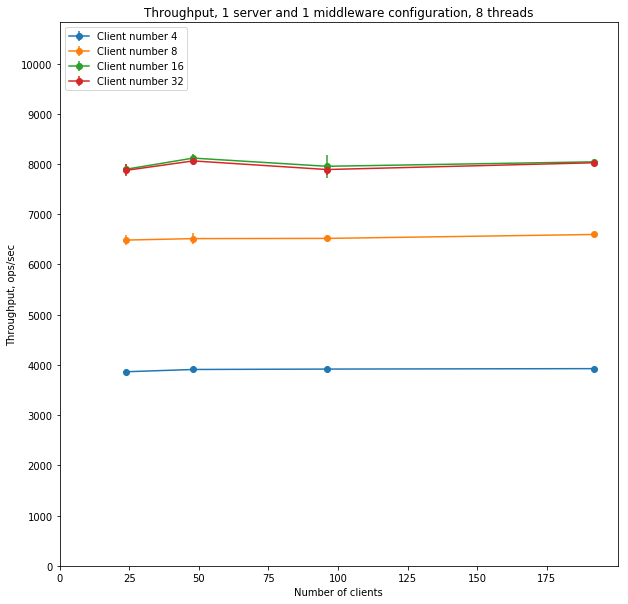

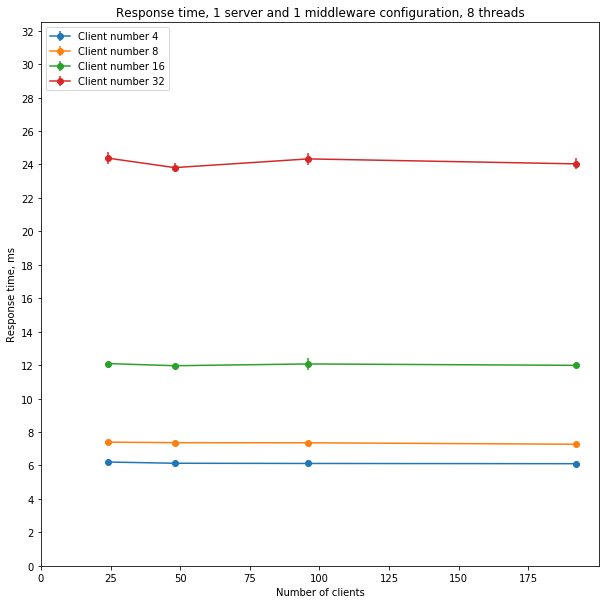

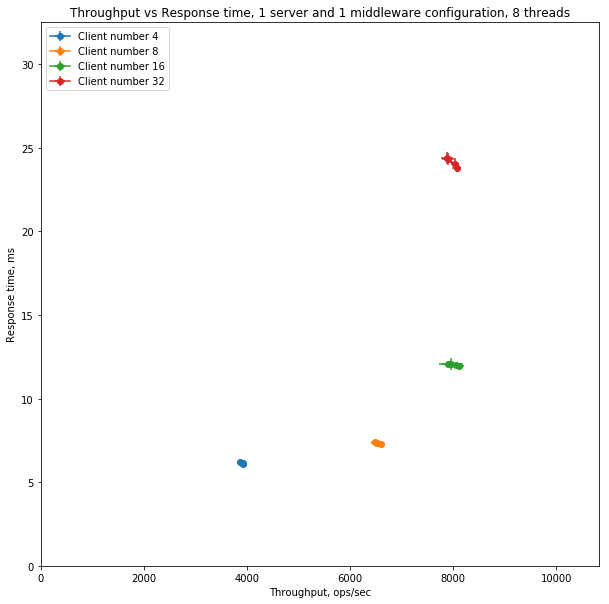

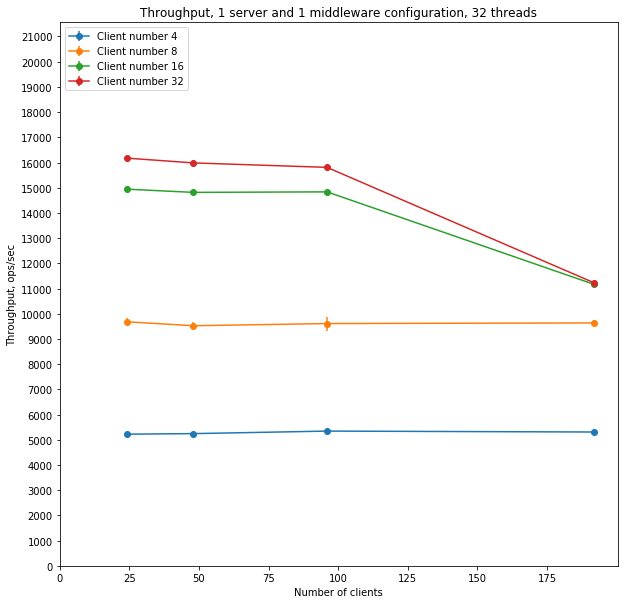

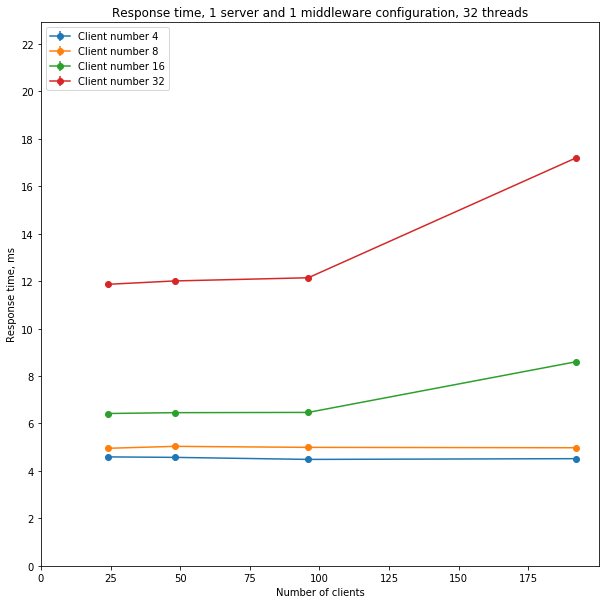

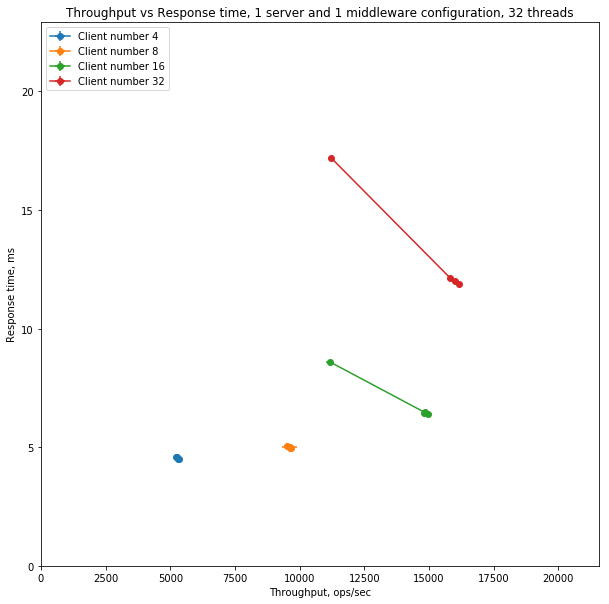

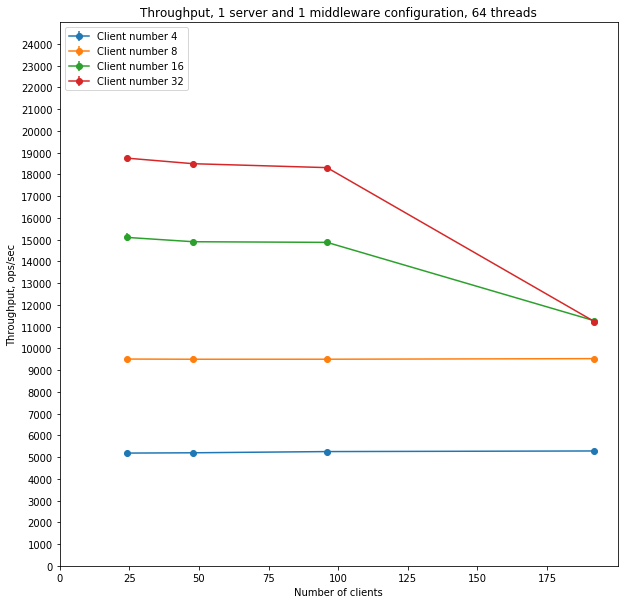

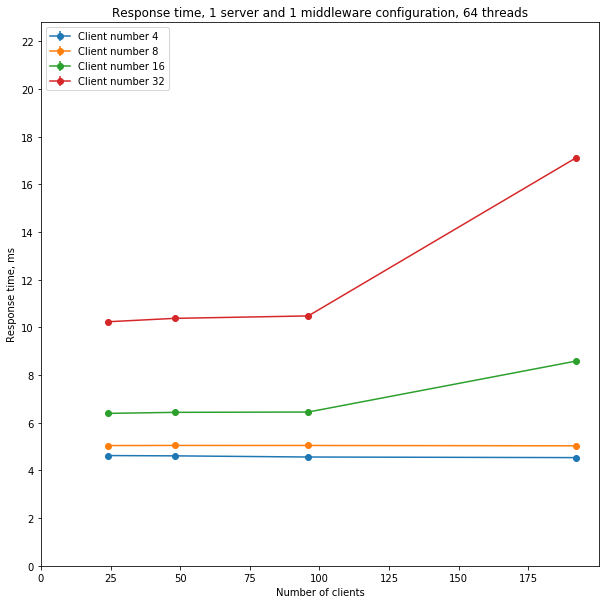

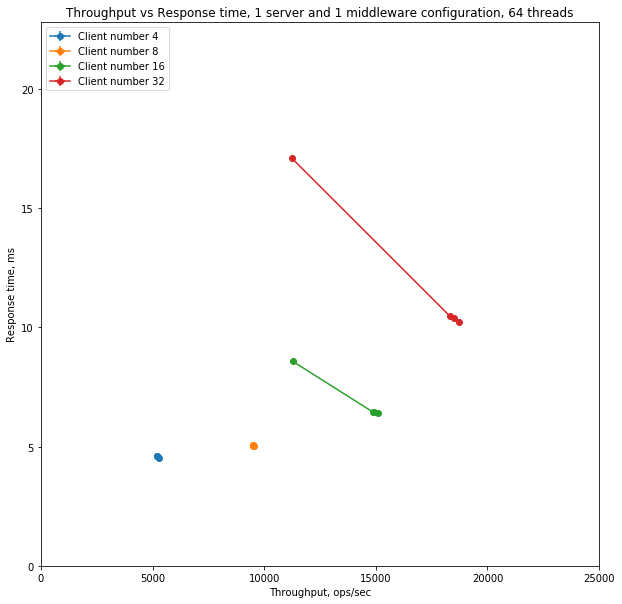

In [13]:
path_to_experiment="/home/anastasiia/experiment_1/fourth_copy/part3/"
value_sizes=[64, 256, 512, 1024]
client_numbers=[4, 8, 16, 32]
workers = [8, 32, 64]
repetitions = 3
memtier_instances = 3
experiments = len(workers) * len(value_sizes) * len(client_numbers) * repetitions
prefix="/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part3_mid_cl_vl_"


import csv
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean 
import re
import numpy as np


clients_data = []

for i in range(memtier_instances):
    initial = open(path_to_experiment+"client"+str(i+1)+".log","r")
    lines = initial.readlines()
    total_ops = 0
    for line in lines:
        if line.startswith("[RUN #1 100%"):
            line = re.sub(' +', ' ', line)
            parts = line.split(' ')
            total_ops = parts[7]
        if line.startswith("Gets"):
            line = re.sub(' +', ' ', line)
            parts = line.split(' ')
            parts = [parts[1], parts[4], total_ops]
            clients_data.append(parts) 
    initial .close()


global_data = pd.DataFrame(columns=['Worker threads', 'Value size', 'Client number', 'Repetition', 'Memtier instance', 'TR', 'RT', 'Total ops'])

j = 0
k = 0
for value_size in value_sizes:
    for w in workers:
        for n in client_numbers:
            for rep in range(repetitions):
                for memtier in range(memtier_instances):
                    d = [w, value_size, n, rep, memtier, clients_data[memtier * experiments + k][0], clients_data[memtier * experiments + k][1], clients_data[memtier * experiments + k][2]]
                    global_data.loc[j] = d
                    j += 1
                k += 1

global_data['Worker threads'] = global_data['Worker threads'].astype(int)
global_data['Value size'] = global_data['Value size'].astype(int)
global_data['Client number'] = global_data['Client number'].astype(int)
global_data['Repetition'] = global_data['Repetition'].astype(int)
global_data['Memtier instance'] = global_data['Memtier instance'].astype(int)
global_data['TR'] = global_data['TR'].astype(float)
global_data['RT'] = global_data['RT'].astype(float)
global_data['Total ops'] = global_data['Total ops'].astype(int)

global_data['Total time'] = global_data['RT']*global_data['Total ops']

TR_graph = []
X_axis =[i * 6 for i in client_numbers]

for w in workers:
    TR_overall = []
    RT_overall = []
    TR_error_overall = []
    RT_error_overall = []
    for client_number in client_numbers:
        TR = []
        RT = []
        TR_error = []
        RT_error = []
        for value_size in value_sizes:
            subset = global_data[(global_data['Worker threads'] == w) &
                                 (global_data['Value size'] == value_size) & 
                                 (global_data['Client number'] == client_number)]
            groupped = subset.groupby(['Repetition']).sum()
            TR_std = np.std(groupped['TR'].values)
            TR_error.append(TR_std)
            TR.append(float(groupped.mean()['TR']))
            groupped1 = subset.groupby(['Repetition']).sum()
            groupped2 = groupped1['Total time']/groupped1['Total ops']
            RT.append(float(groupped2.mean()))
            RT_std = np.std(groupped2.values)
            RT_error.append(RT_std)
        TR_overall.append(TR)
        RT_overall.append(RT)
        TR_error_overall.append(TR_error)
        RT_error_overall.append(RT_error)

    plt.figure(figsize=(10, 10))
    plt.title("Throughput, 1 server and 1 middleware configuration, "+str(w) + " threads")
    max1 = 0
    for i in range(len(TR_overall)):
        plt.errorbar(X_axis, TR_overall[i],
                yerr=TR_error_overall[i],
                fmt='-o',
                label="Client number "+str(client_numbers[i]))
        max2 = max(TR_overall[i]) + max(TR_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xticks(np.arange(0, max(X_axis), 25))
    plt.yticks(np.arange(0, max1, 1000))
    plt.ylabel('Throughput, ops/sec')
    plt.xlabel('Number of clients')
    plt.legend(loc="upper left")
    plt.savefig(prefix + str(w)+"_tr.png", dpi=300)
    plt.show()

    max1 = 0
    plt.figure(figsize=(10, 10))
    plt.title("Response time, 1 server and 1 middleware configuration, "+str(w) + " threads")
    for i in range(len(RT_overall)):
        plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Client number "+str(client_numbers[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xticks(np.arange(0, max(X_axis), 25))
    plt.yticks(np.arange(0, max1, 2))
    plt.ylabel('Response time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.savefig(prefix + str(w)+"_rt.png", dpi=300) 
    plt.show()

    max1 = 0
    plt.figure(figsize=(10, 10))
    plt.title("Throughput vs Response time, 1 server and 1 middleware configuration, "+str(w) + " threads")
    for i in range(len(RT_overall)):
        plt.errorbar(TR_overall[i], RT_overall[i],
                xerr=TR_error_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Client number "+str(client_numbers[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/3
        if max2 > max1:
            max1 = max2
    tr_max = 0
    for i in range(len(TR_overall)):
        max2 = max(TR_overall[i]) + max(TR_overall[i])/3
        if max2 > tr_max:
            tr_max = max2
    plt.ylim(0, max1)
    plt.xlim(0, tr_max)
    plt.ylabel('Response time, ms')
    plt.xlabel('Throughput, ops/sec') 
    plt.legend(loc="upper left")
    plt.savefig(prefix + str(w)+"_rttr.png", dpi=300) 
    plt.show()

In [ ]:
for i in range(len(TR_overall)):
    print(TR_overall[i])
    print(RT_overall[i])
    print([(1/t) * 1000 * c - r1 for t, c, r1 in zip(TR_overall[i], X_axis, RT_overall[i])])
    for j in range(len(TR_overall[i]) - 1):
        print((RT_overall[i][j+1]-RT_overall[i][j])/(X_axis[j+1]-X_axis[j]))
    RT_Z = [(1/t) * 1000 * c for t, c in zip(TR_overall[i], X_axis)]
    plt.figure(figsize=(10,10))
    plt.plot(X_axis, RT_Z)
    plt.ylim(0, max(RT_Z) + max(RT_Z)/2)
    plt.show()

In [104]:
TR_MAX = 16206.52
TR = np.array([5231.379487179488, 9694.271794871796, 14943.916117216117, 16169.902564102564])
RT = np.array([1.5266963952244785, 1.7436725785198028, 2.8998161574088632, 8.550608902706548])
QT = np.array([0.18896226812754197, 0.41706310308545946, 1.4471863988594802, 6.595007946070111])
ST = np.array([1.2581512549026144, 1.2710535378280488, 1.3996067588243442, 1.910121082822122])
PT = np.array([1.3377341270969367, 1.3266094754343434, 1.4526297585493828, 1.9556009566364352])
QS = np.array([4.6302676452453095, 10.741923197574248, 33.807884157759425, 97.30760218969652])
SR = 1000/ ST
print("Service rate based on service time=", SR)

po = TR / TR_MAX
print("utilization=", po)
ST1 = 1000 / TR_MAX
print("service time based on max throughput=", ST1)
MU = 1000 / ST
print("service rate based on service time=", MU)
QT1 = (QS / TR) * 1000
print("Queue time according to little's law=", QT1)
RT1 = QT1 + ST
print("Response time1=", RT1)
print("\n")

print(po / (1 - po))
print((1/TR_MAX))

Service rate based on service time= [794.81699526 786.74892146 714.48640391 523.52702087]
utilization= [0.32279474 0.59817109 0.92209284 0.99774057]
service time based on max throughput= 0.06170356128274299
service rate based on service time= [794.81699526 786.74892146 714.48640391 523.52702087]
Queue time according to little's law= [0.88509497 1.10806912 2.26231758 6.01782242]
Response time1= [2.14324622 2.37912266 3.66192434 7.9279435 ]


[  0.47665718   1.48862136  11.83579135 441.59024704]
6.1703561282743e-05


In [101]:
TR_MAX = 11345.03
TR = np.array([5291.9025641025655, 9527.779487179487, 11154.066666666668, 11163.574358974356])
RT = np.array([1.496147476405655, 1.8204623780287281, 5.346322808330685, 13.93469695626389])
QT = np.array([0.18654916413175038, 0.3916778844264841, 1.4608934168198053, 8.472605731920252])
ST = np.array([1.229823794650947, 1.3708857823035154, 3.8315876973466727, 5.411628111022249])
PT = np.array([1.3095983122739046, 1.428784493602244, 3.88542939151088, 5.462091224343641])
QS = np.array([4.588902638864797, 10.931445269083603, 24.440098425640322, 67.9044300212642])

po = TR / TR_MAX
print("utilization=", po)
ST1 = 1000 / TR_MAX
print("service time based on max throughput=", ST1)
MU = 1000 / ST
print("service rate based on service time=", MU)
QT1 = (QS / TR) * 1000
print("Queue time according to little's law=", QT1)
RT1 = QT1 + ST
print("Response time1=", RT1)

utilization= [0.46645117 0.83981968 0.98316767 0.98400572]
service time based on max throughput= 0.0881443239903288
service rate based on service time= [813.12461537 729.45537324 260.98841498 184.78727279]
Queue time according to little's law= [0.86715554 1.1473235  2.19113792 6.08267817]
Response time1= [ 2.09697934  2.51820928  6.02272562 11.49430628]
